# **Cloning the git repo to use the source codes**

In [ ]:
!git clone https://github.com/IJustKen/depression_project.git

Cloning into 'depression_project'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 277 (delta 50), reused 3 (delta 3), pack-reused 167 (from 1)
Receiving objects: 100% (277/277), 5.61 MiB | 17.19 MiB/s, done.
Resolving deltas: 100% (106/106), done.


In [ ]:

!git pull

Already up to date.


In [ ]:
import sys
sys.path.append('/content/depression_project/funcs')
sys.path.append('/content/depression_project/data')

In [ ]:
%cd depression_project

/content/depression_project/depression_project/depression_project/depression_project


# **Importing Necessary Functions**

In [ ]:
# Imports from data_preprocessing.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from funcs.data_preprocessing import (
    num_cat_column_analysis,
    rm_rows_with_val,
    rm_rows_with_rare_cats,
    one_hot_encode_dataframe,
    Z_Scaler,
    MinMax_Scaler,
)

# Imports from eda_plotting.py
from funcs.eda_plotting import (
    analyze_feature_distributions,
    plot_feature_target_correlations,
    plot_grouped_boxplots,
)

# Imports from feature_selection.py
from funcs.feature_selection import (
    feat_eng,
    select_features_with_rf,
    select_features_with_lasso,
    apply_pca,
)

# Imports from classification.py
from funcs.classification import (
    classify_svc,
    classify_rf,
    classify_logistic,
    classify_dt,
    classify_knn,
    classify_gnb,
)

# Imports from model_evaluation.py
from funcs.model_evaluation import (
    compare_clf,
)

# Imports from hyperparameter_tuning.py
from funcs.hyperparameter_tuning import (
    best_svc_params_gridsearch,
    best_svc_params_randomizedsearch,
    best_rf_params_gridsearch,
    best_rf_params_randomizedsearch,
    best_dt_params_gridsearch,
    best_dt_params_randomizedsearch,
    best_knn_params_gridsearch,
    best_knn_params_randomizedsearch,
    best_gnb_params_gridsearch
)


# Imports from regression.py
from funcs.regression import (
    get_training_scores,
    regress_linear,
    regress_bagging,
    regress_rf,
    compare_regs,
)

# **Data Loading and Superficial Analysis**

Checking for null values, unique values, datatypes, total samples and features

In [ ]:
import pandas as pd
# %cd ..
data = pd.read_csv("data/student_depression_dataset.csv")

In [ ]:
data

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [ ]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
data.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
num_cols,cat_cols=num_cat_column_analysis(data)

Column Analysis for: id
    - Total Unique Values (n): 27901
    - Type: Numerical/High Cardinality
    - Min: 2
    - Max: 140699
    - Mean: 70442.15
Column Analysis for: Gender
    - Total Unique Values (n): 2
    - Type: Categorical/Ordinal/Low Cardinality
    - Value Counts:
Gender
Male      15547
Female    12354
Name: count, dtype: int64
Column Analysis for: Age
    - Total Unique Values (n): 34
    - Type: Numerical/High Cardinality
    - Min: 18.0
    - Max: 59.0
    - Mean: 25.82
Column Analysis for: City
    - Total Unique Values (n): 52
    - Type: Categorical/Ordinal/Low Cardinality
    - Value Counts:
City
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            

# **Exploratory Data Analysis**
Frequency/probability distributions of features against Depression,
Value counts of unique values of target variable Depression,
Correlation coefficient of features with target variable Depression,
Boxplots of features against target variable to see potential outliers

Found 8 numerical features.
Found 9 categorical features.


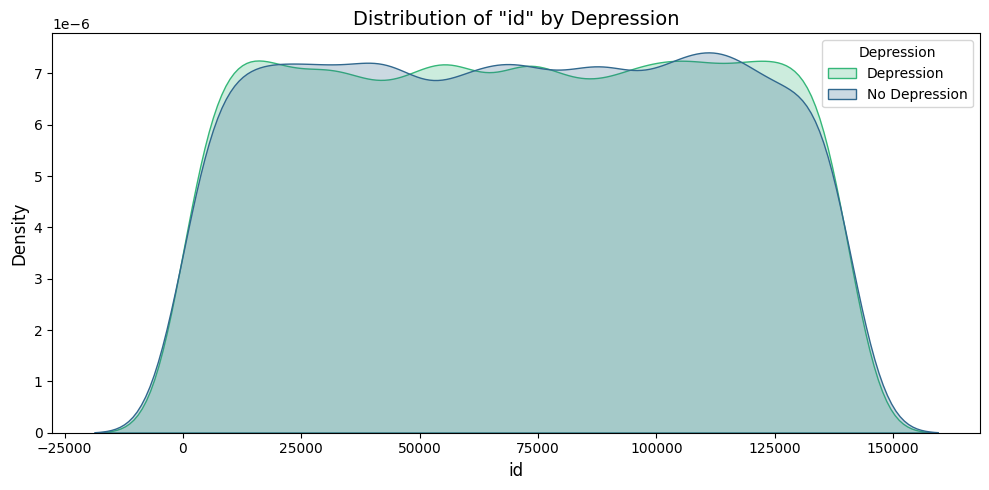

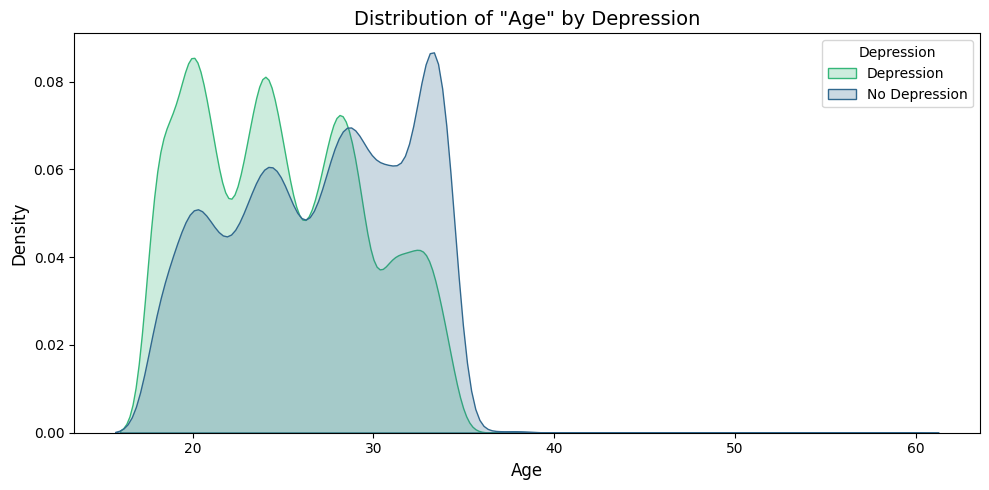

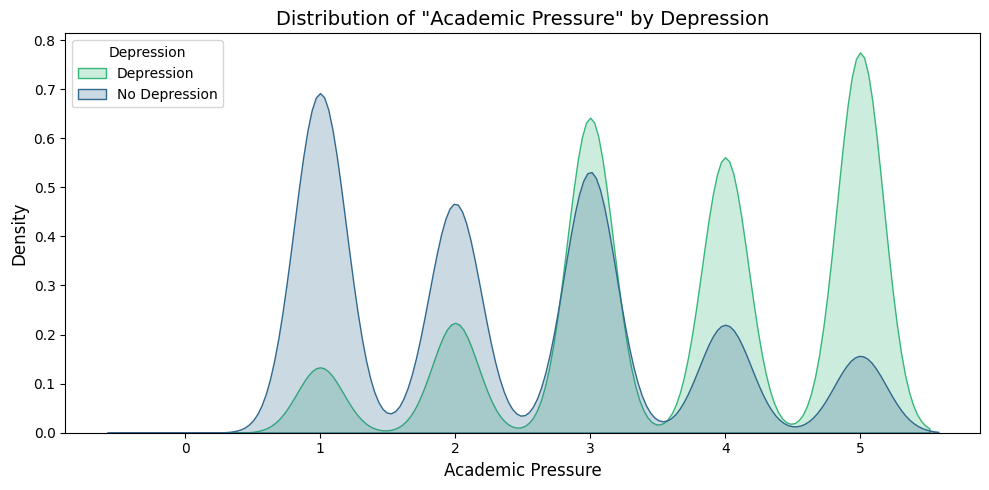

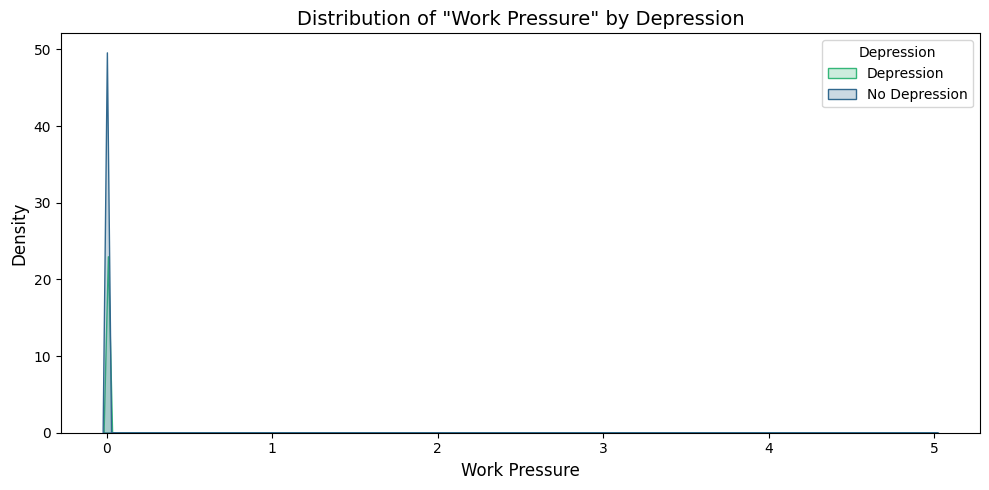

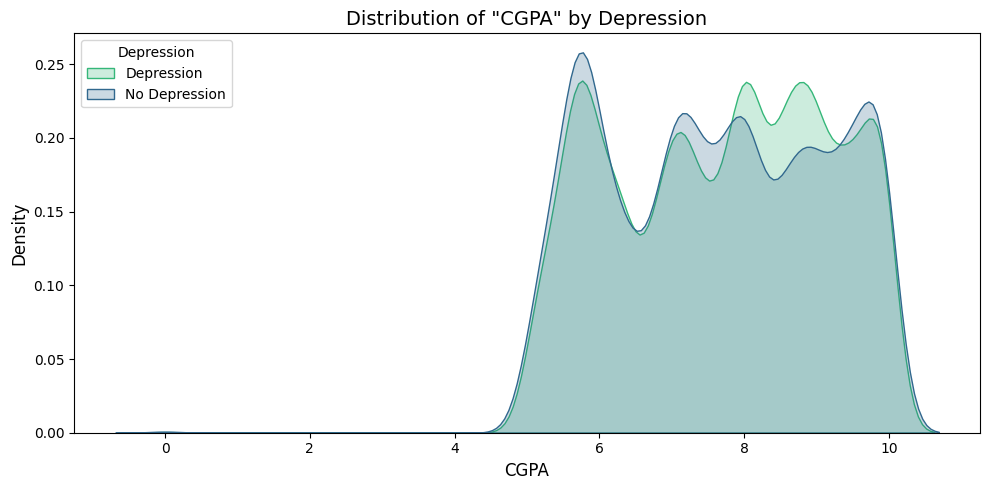

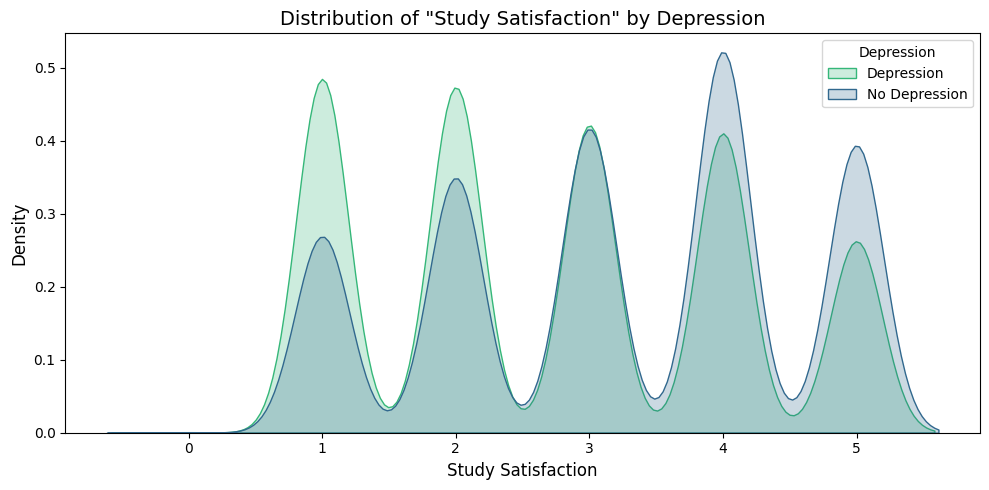

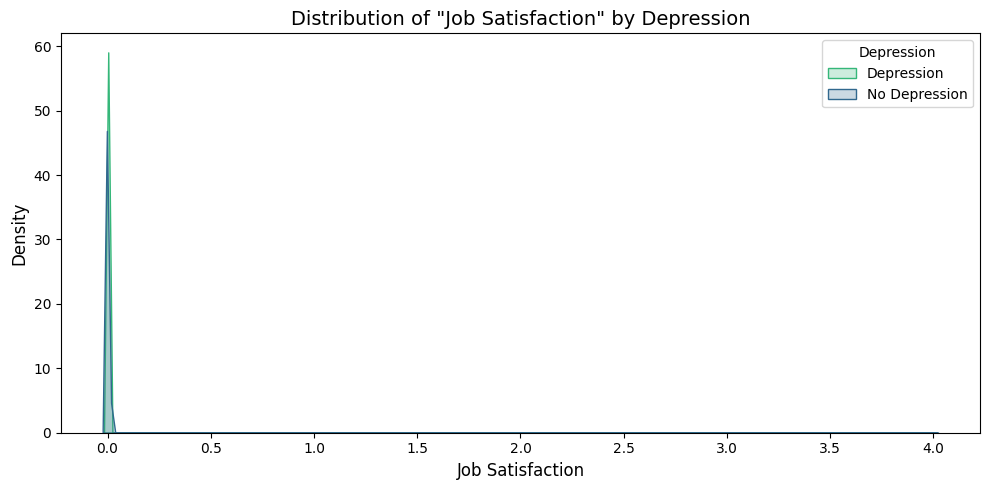

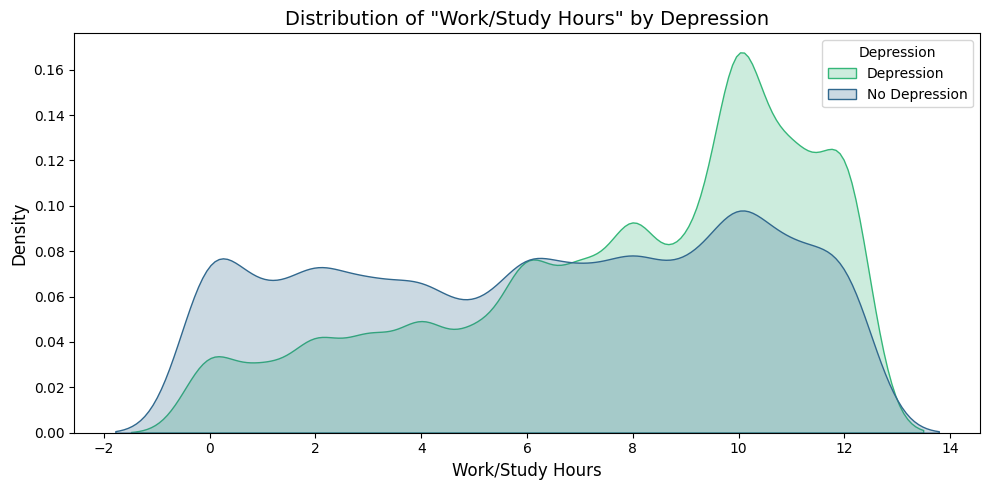

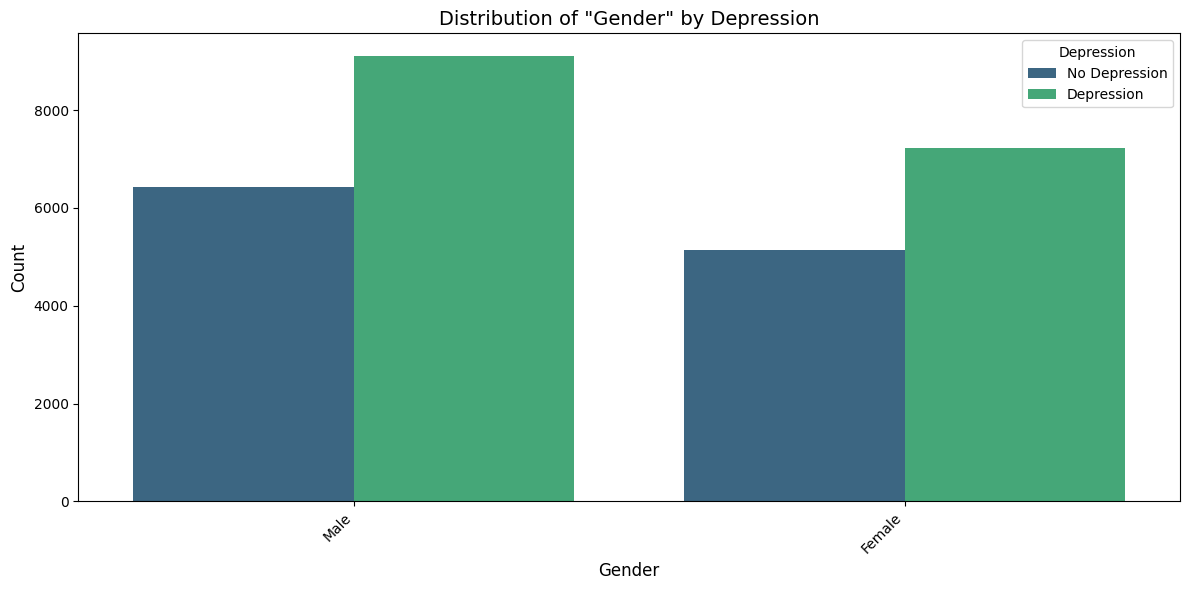

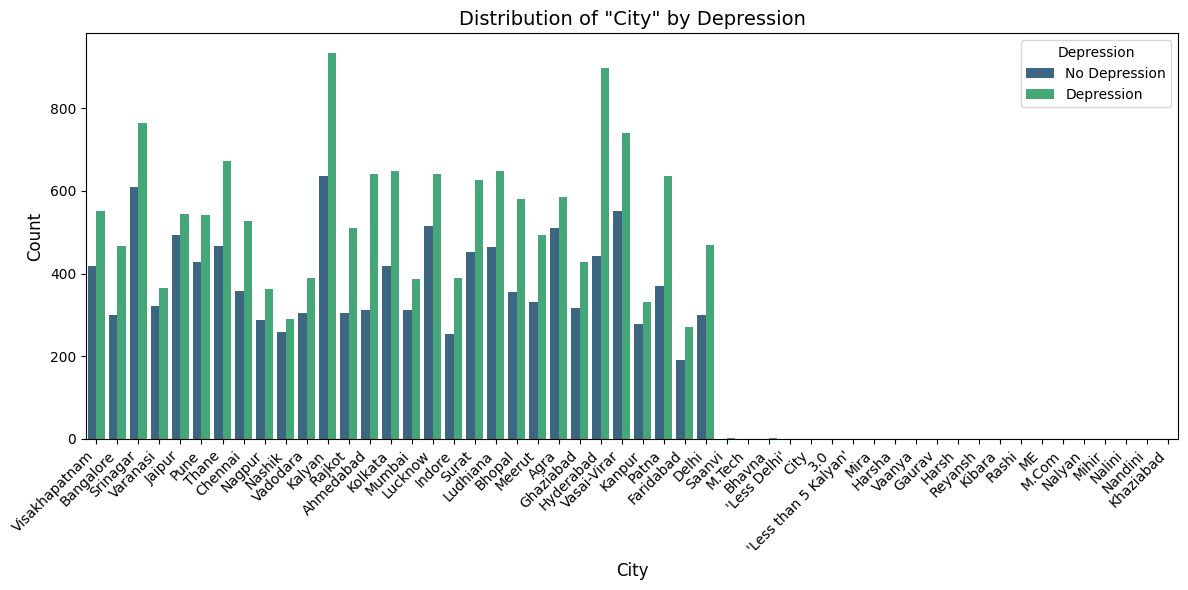

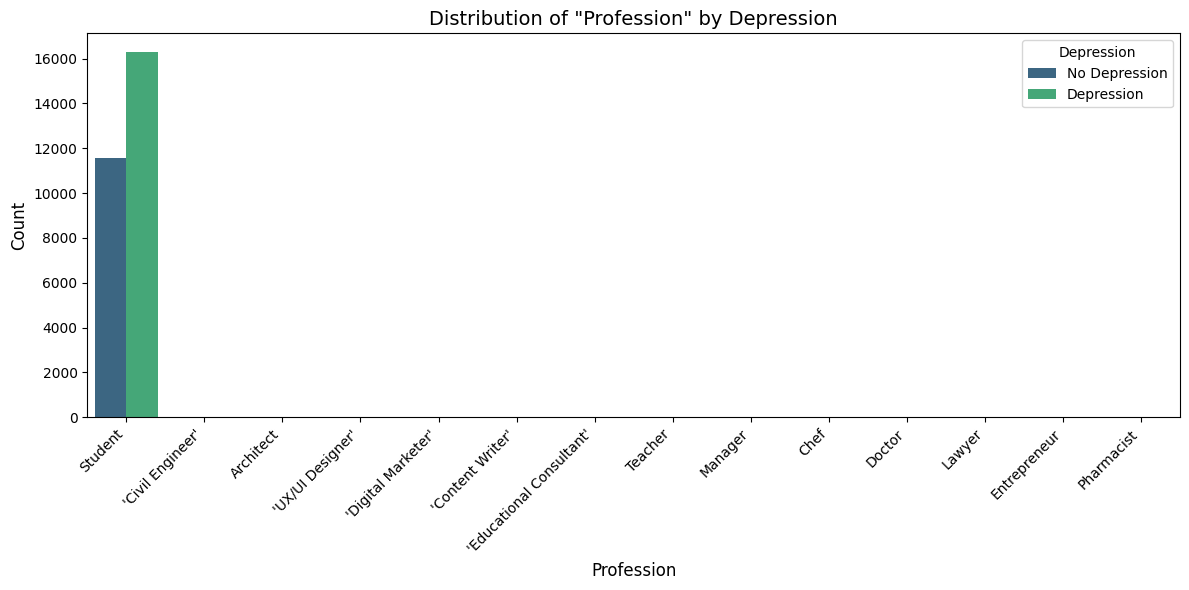

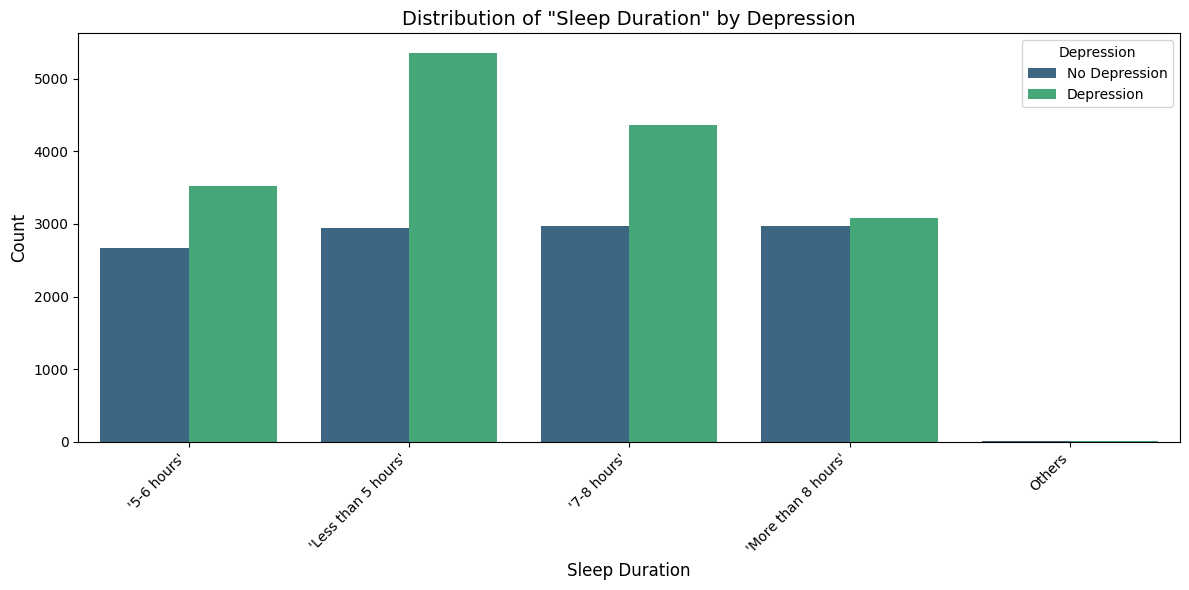

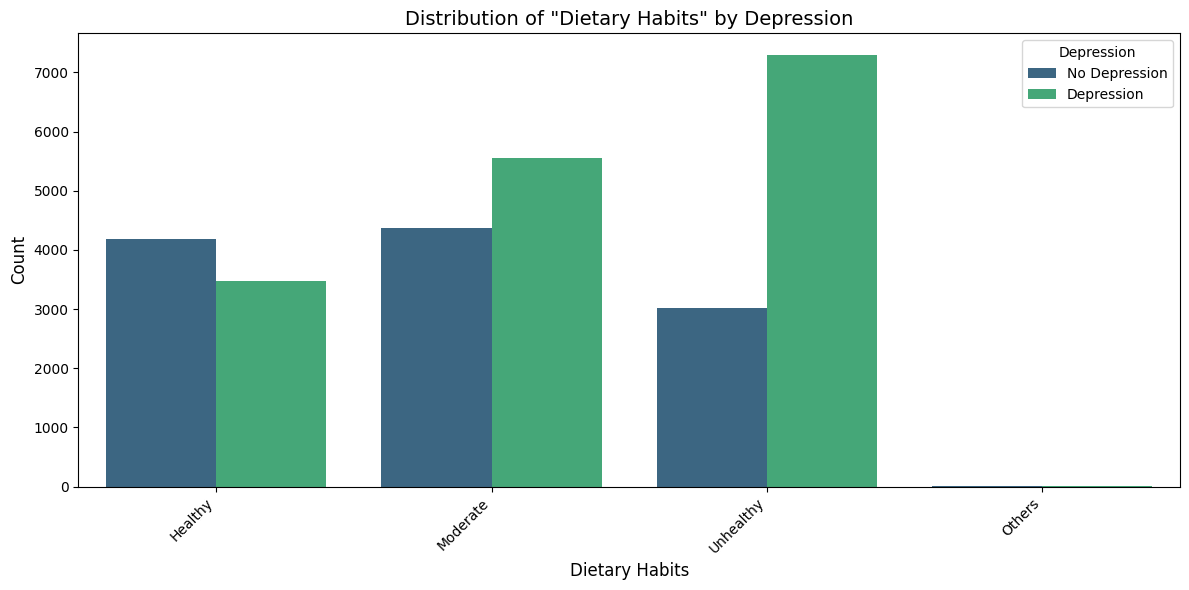

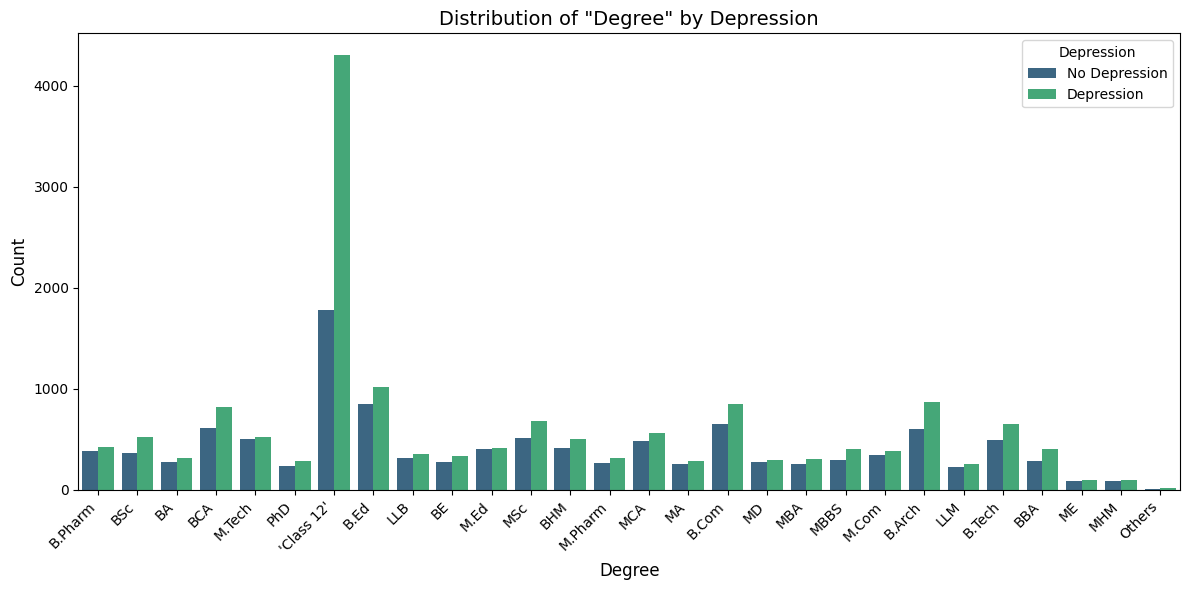

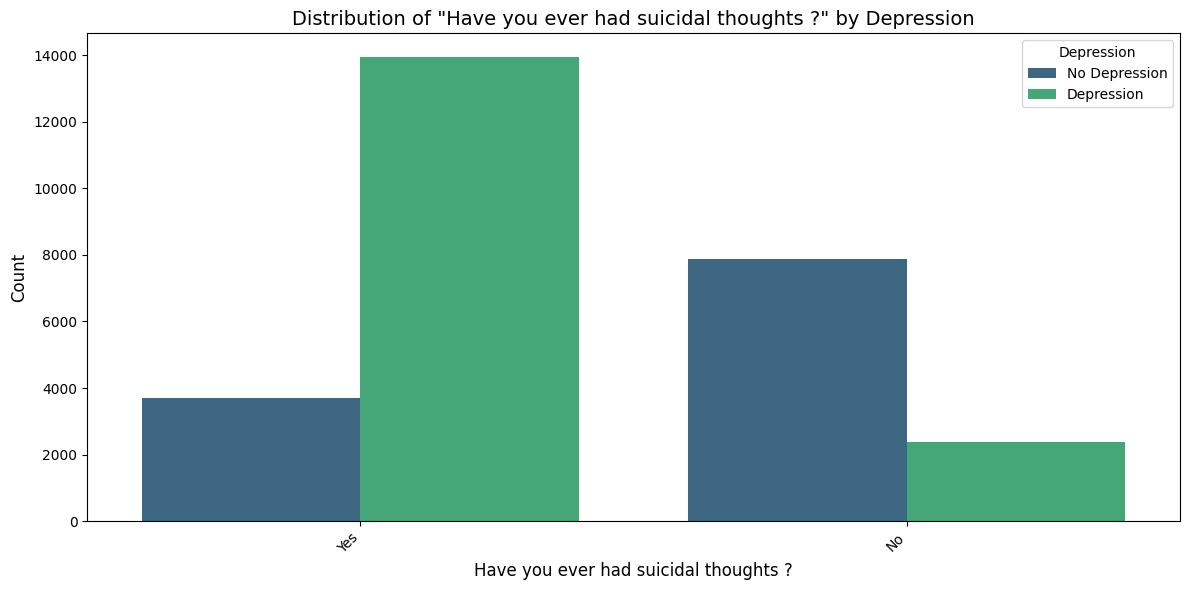

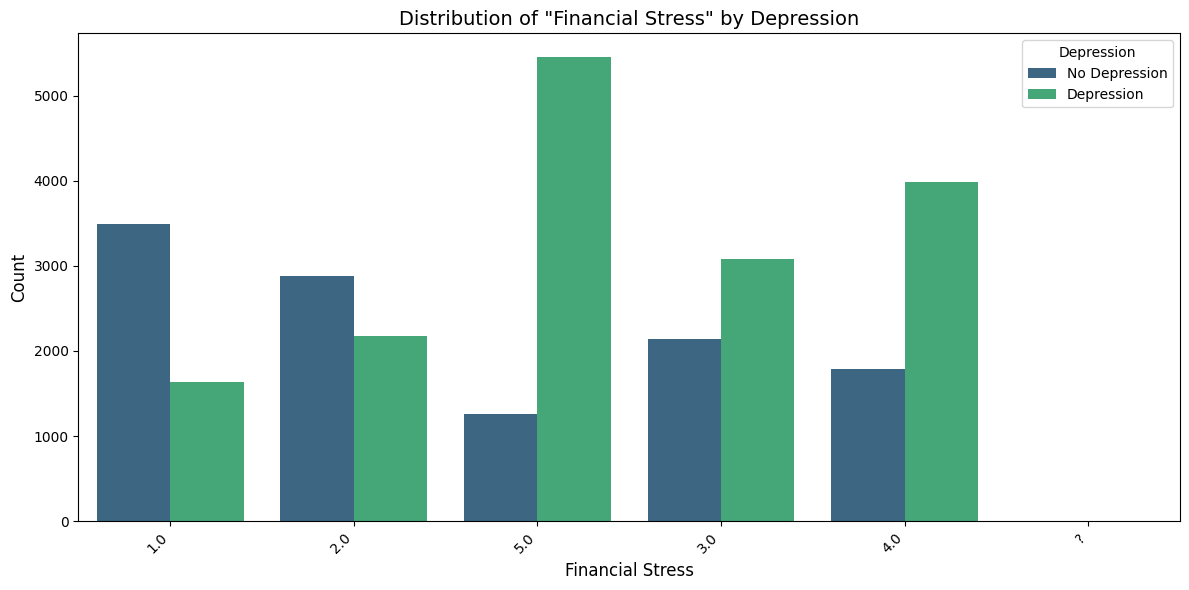

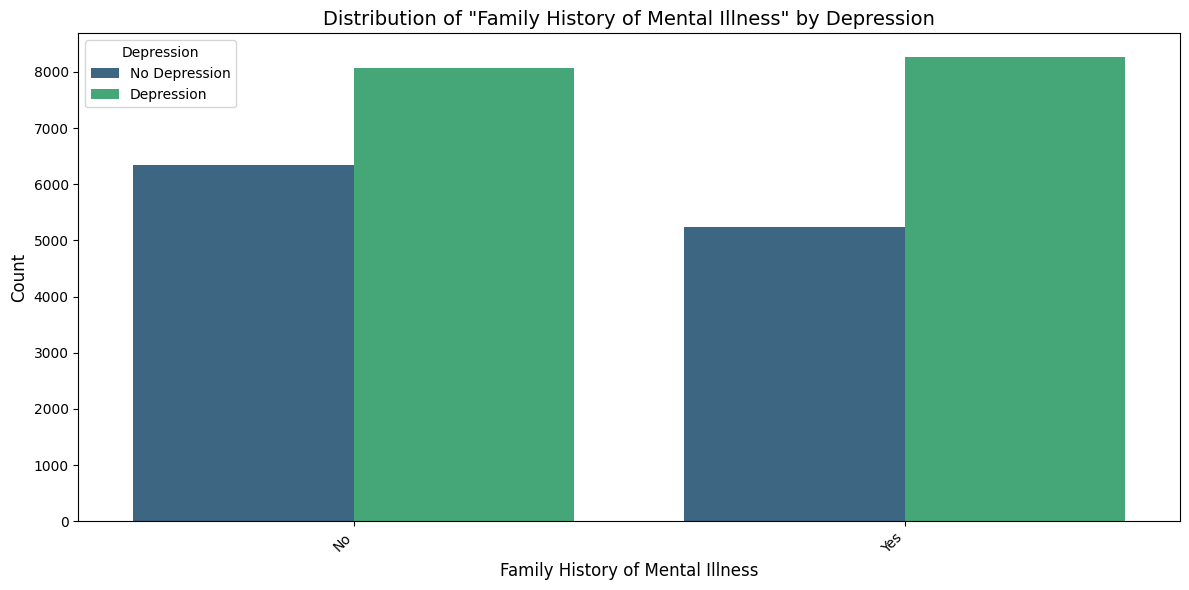

In [ ]:
analyze_feature_distributions(data)

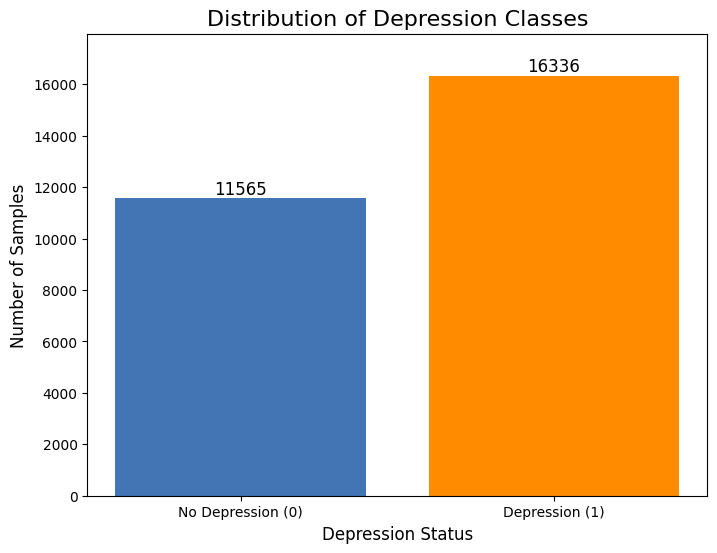

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

Y = data['Depression']


class_counts = Y.value_counts().sort_index()


plt.figure(figsize=(8, 6))
bars = plt.bar(
    ['No Depression (0)', 'Depression (1)'],
    class_counts.values,
    color=['#4374B3', '#FF8C00']
)


plt.title('Distribution of Depression Classes', fontsize=16)
plt.ylabel('Number of Samples', fontsize=12)
plt.xlabel('Depression Status', fontsize=12)
plt.ylim(0, max(class_counts.values) * 1.1) # Give some space on top


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=12)


plt.show()


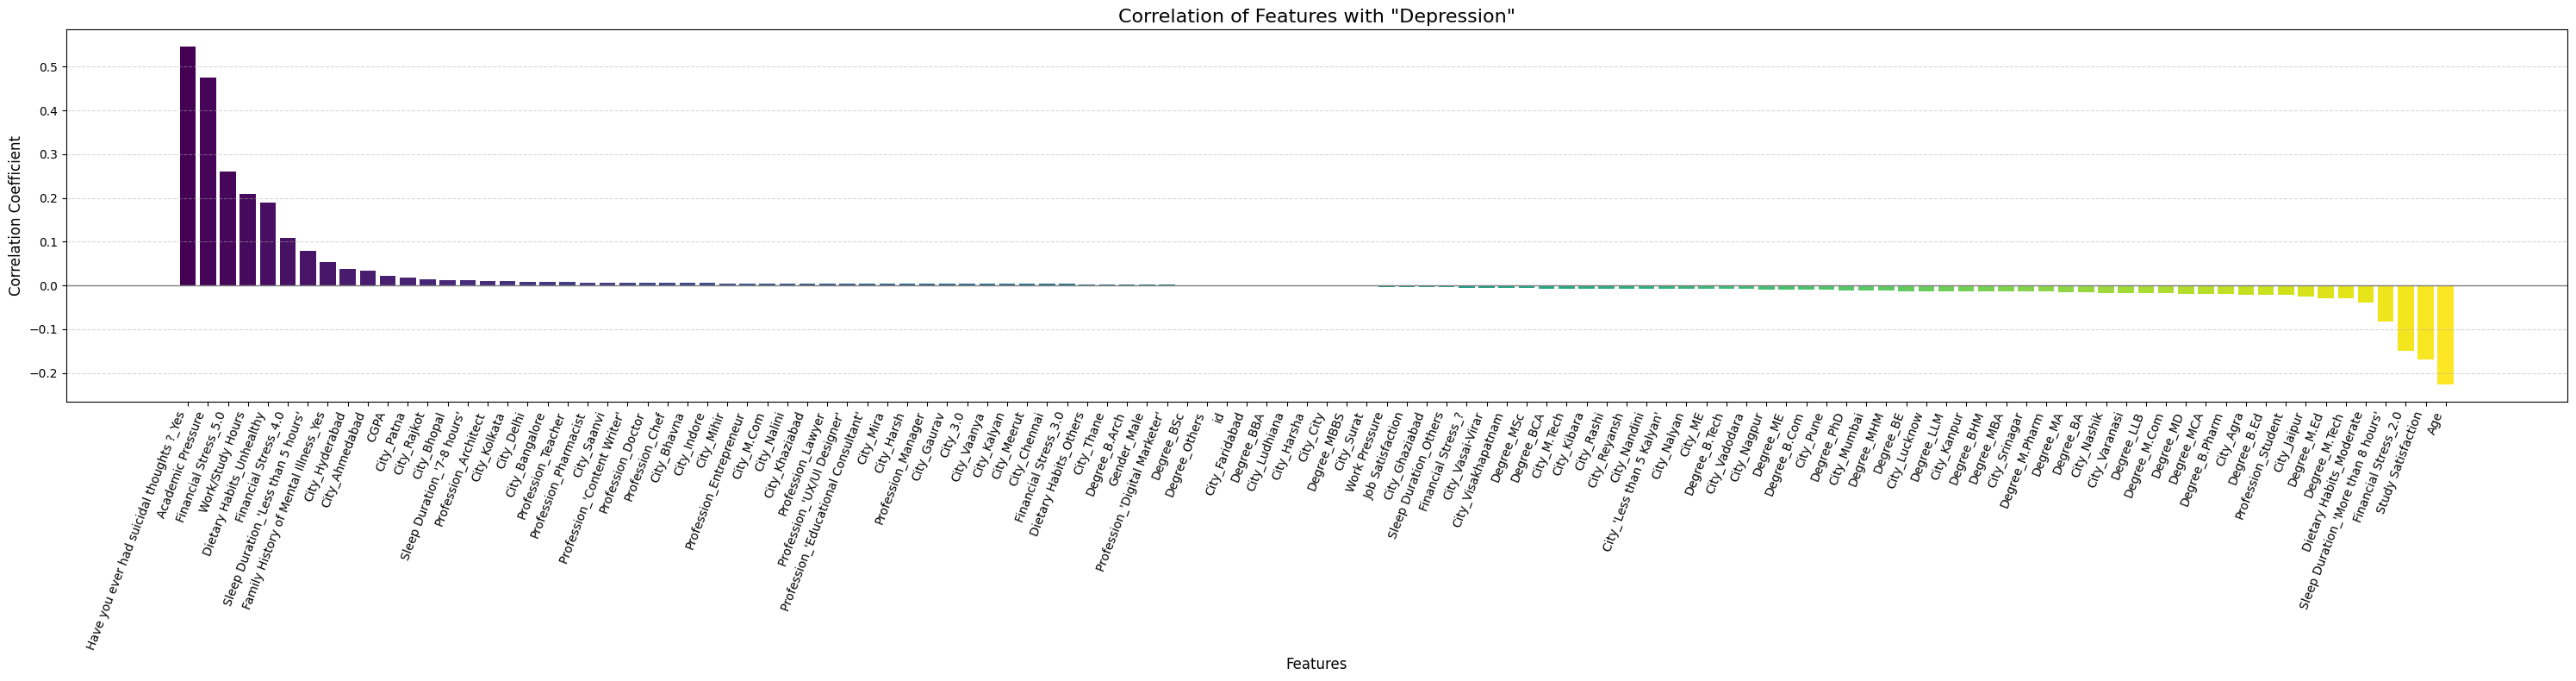

In [ ]:
import copy
temp_df = pd.get_dummies(copy.deepcopy(data), drop_first=True)
plot_feature_target_correlations(temp_df)

Generating boxplots for 8 numerical features...


/content/depression_project/funcs/eda_plotting.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=feature, palette='viridis')


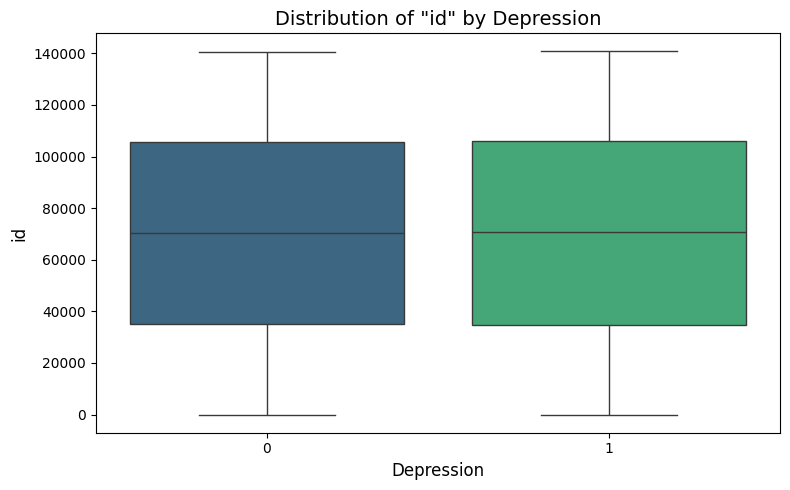

/content/depression_project/funcs/eda_plotting.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=feature, palette='viridis')


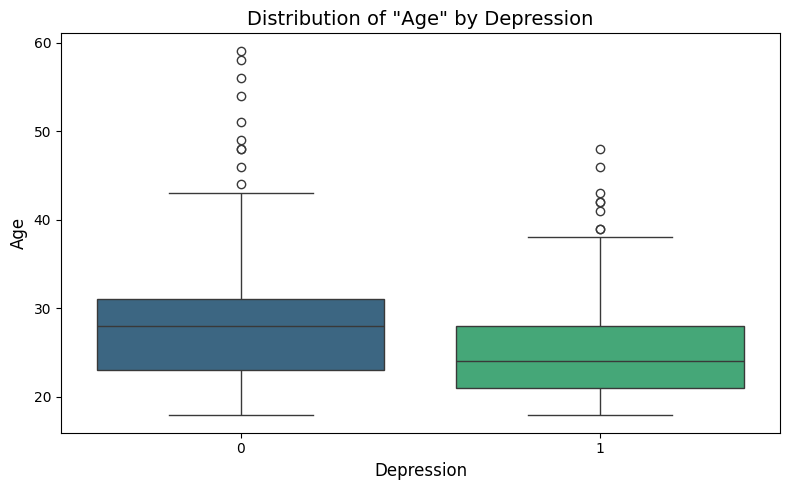

/content/depression_project/funcs/eda_plotting.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=feature, palette='viridis')


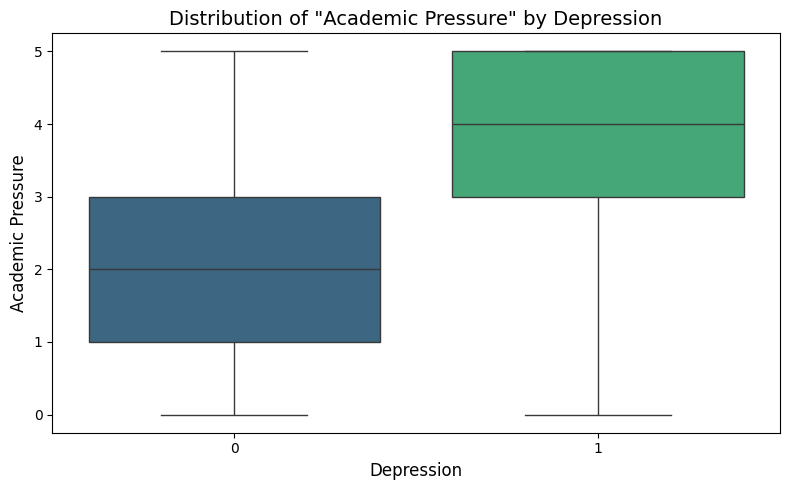

/content/depression_project/funcs/eda_plotting.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=feature, palette='viridis')


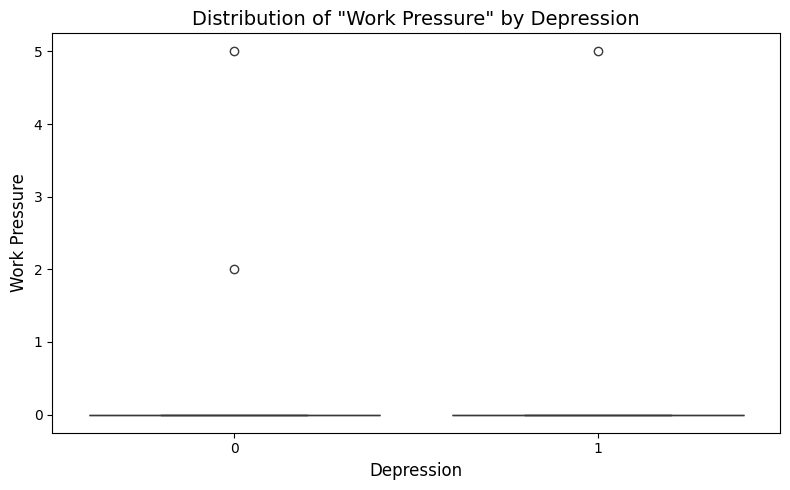

/content/depression_project/funcs/eda_plotting.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=feature, palette='viridis')


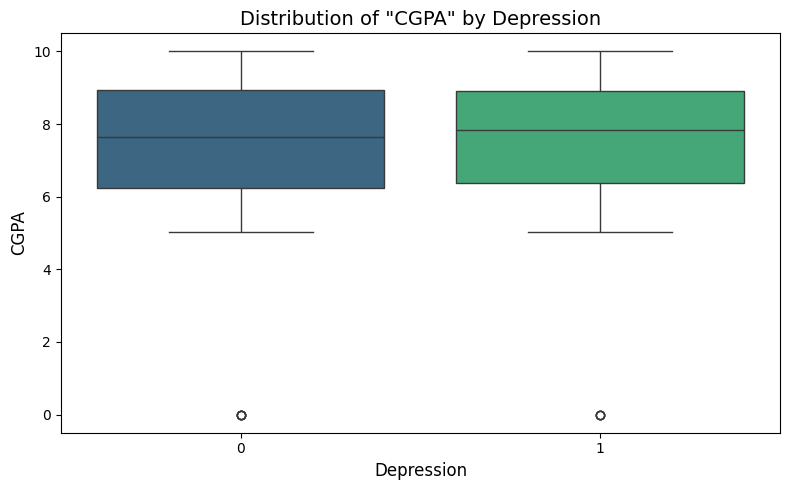

/content/depression_project/funcs/eda_plotting.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=feature, palette='viridis')


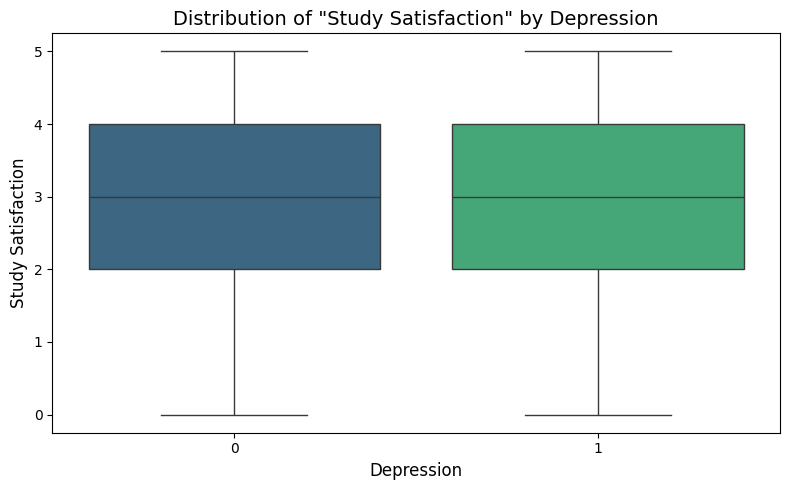

/content/depression_project/funcs/eda_plotting.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=feature, palette='viridis')


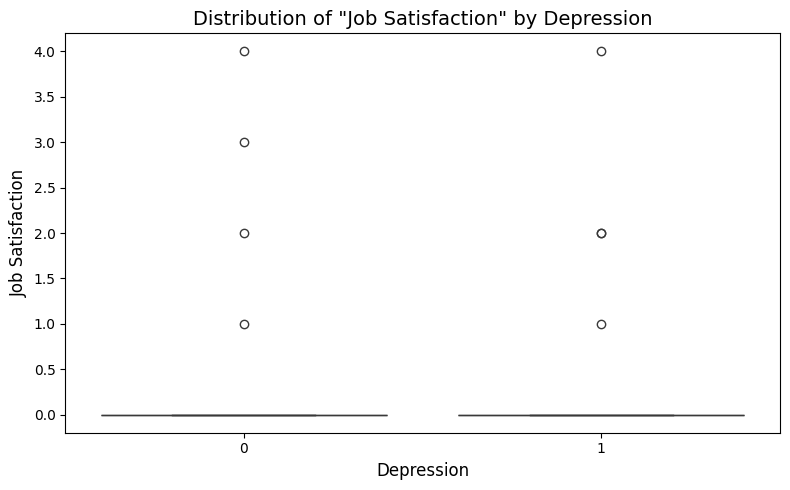

/content/depression_project/funcs/eda_plotting.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=feature, palette='viridis')


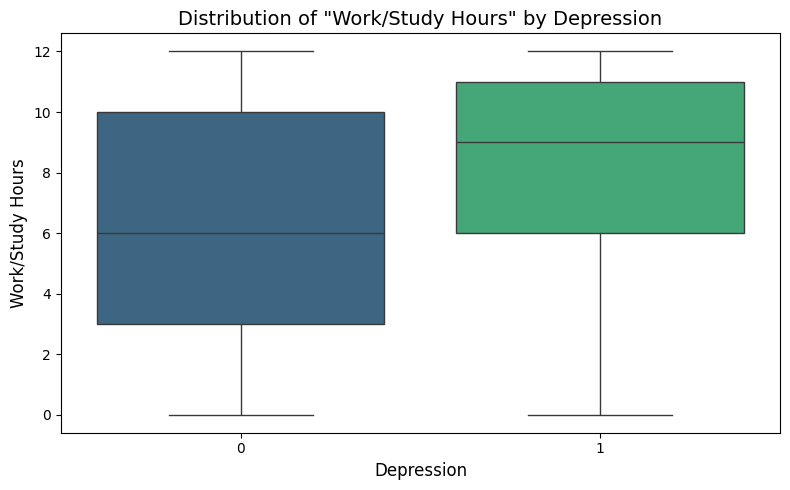

In [ ]:
plot_grouped_boxplots(data)

# **Data Preprocessing and Cleaning**

In [ ]:
print(f"**Numerical Columns** ({len(num_cols)}):")
print(num_cols)
print()
print(f"**Categorical Columns** ({len(cat_cols)}):")
print(cat_cols)

**Numerical Columns** (9):
['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Depression']

**Categorical Columns** (9):
['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']


In [ ]:
Y=data['Depression']
X=data.drop('Depression',axis=1)
data_new=X.drop('id',axis=1).copy()
# removal of '?'
column_name = 'Financial Stress'
print(f"Initial unique values: {data[column_name].unique()}")
data[column_name] = data[column_name].replace('?', np.nan)
data['Financial Stress'] = pd.to_numeric(data['Financial Stress'], errors='raise')
print(f"New data type for '{column_name}': {data[column_name].dtype}")
print(f"Number of missing values (NaN) now: {data[column_name].isna().sum()}")

#imputation with median
median_value = data[column_name].median()
data[column_name]=data[column_name].fillna(median_value)
print(f"Imputed NaN with median: {median_value}")
print(f"Missing values after imputation: {data[column_name].isna().sum()}")

Initial unique values: ['1.0' '2.0' '5.0' '3.0' '4.0' '?']
New data type for 'Financial Stress': float64
Number of missing values (NaN) now: 3
Imputed NaN with median: 3.0
Missing values after imputation: 0


In [ ]:
num_cols,cat_cols=num_cat_column_analysis(data)

Column Analysis for: id
    - Total Unique Values (n): 27901
    - Type: Numerical/High Cardinality
    - Min: 2
    - Max: 140699
    - Mean: 70442.15
Column Analysis for: Gender
    - Total Unique Values (n): 2
    - Type: Categorical/Ordinal/Low Cardinality
    - Value Counts:
Gender
Male      15547
Female    12354
Name: count, dtype: int64
Column Analysis for: Age
    - Total Unique Values (n): 34
    - Type: Numerical/High Cardinality
    - Min: 18.0
    - Max: 59.0
    - Mean: 25.82
Column Analysis for: City
    - Total Unique Values (n): 52
    - Type: Categorical/Ordinal/Low Cardinality
    - Value Counts:
City
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            

In [ ]:
data_num=data[num_cols]
data_cat=data[cat_cols]

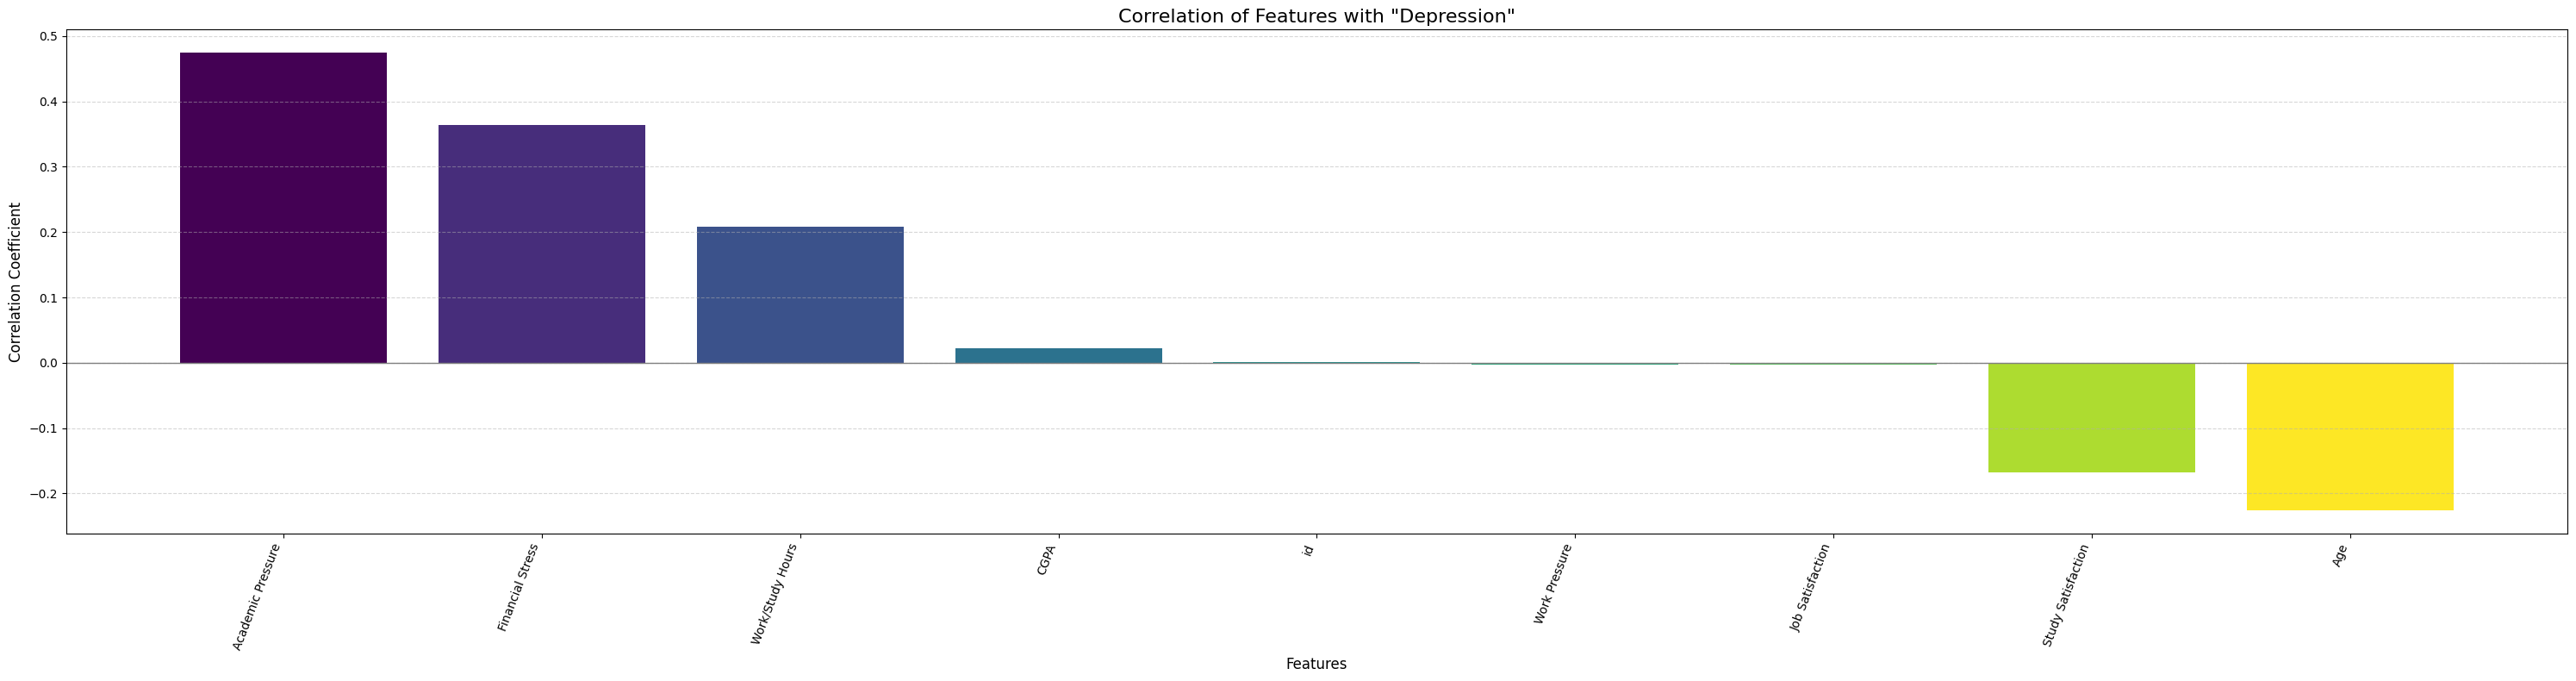

In [ ]:
plot_feature_target_correlations(data_num)

In [ ]:
#label encoding using .map() for two columns sleep duration and dietary habits as they have ordinal categories.
sleep_mapping = {
    "'Less than 5 hours'": 1,
    "'5-6 hours'": 2,
    "'7-8 hours'": 3,
    "'More than 8 hours'":4,

    # Add other categories if they exist (e.g., 'More than 8 hours': 4)
}
diet_mapping = {
    'Unhealthy': 1,
    'Moderate': 2,
    'Healthy': 3
}

data_cat['Sleep Duration_Encoded'] = data_cat['Sleep Duration'].map(sleep_mapping)
data_cat['Dietary Habits_Encoded'] = data_cat['Dietary Habits'].map(diet_mapping)
sleep_enc=data_cat['Sleep Duration_Encoded']
diet_enc=data_cat['Dietary Habits_Encoded']
data_cat['Sleep Duration_Encoded']=sleep_enc.fillna(sleep_enc.mode()[0])
data_cat['Dietary Habits_Encoded']=diet_enc.fillna(diet_enc.mode()[0])

/tmp/ipython-input-4162201973.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['Sleep Duration_Encoded'] = data_cat['Sleep Duration'].map(sleep_mapping)
/tmp/ipython-input-4162201973.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['Dietary Habits_Encoded'] = data_cat['Dietary Habits'].map(diet_mapping)
/tmp/ipython-input-4162201973.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [ ]:
df_new_feat = feat_eng(data_num).drop(columns=['id','Work Pressure','Job Satisfaction'],axis=1)
data_ohe=data_cat.drop(['Sleep Duration','Dietary Habits','Sleep Duration_Encoded','Dietary Habits_Encoded'],axis=1)
df_new_feat[['Sleep Duration','Dietary Habits']]=data_cat[['Sleep Duration_Encoded','Dietary Habits_Encoded']]
data_num=df_new_feat
data_num_scaled_Z=Z_Scaler(df_new_feat)
data_num_scaled_MM=MinMax_Scaler(df_new_feat)

/content/depression_project/funcs/feature_selection.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average_Satisfaction'] = (df['Study Satisfaction'] + df['Job Satisfaction']) / 2
/content/depression_project/funcs/feature_selection.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Resilience'] = df['CGPA'] * (df['Academic Pressure'] + df['Work Pressure']) * df['Work/Study Hours']
/content/depression_project/funcs/feature_selection.py:12: SettingWithCopyWarning: 
A value is trying to be set on

In [ ]:
data_num

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression,Average_Satisfaction,Resilience,Pressure_Satisfaction_Ratio,Sleep Duration,Dietary Habits
0,33.0,5.0,8.97,2.0,3.0,1.0,1,1.0,134.55,4.950495,2.0,3.0
1,24.0,2.0,5.90,5.0,3.0,2.0,0,2.5,35.40,0.796813,2.0,2.0
2,31.0,3.0,7.03,5.0,9.0,1.0,0,2.5,189.81,1.195219,1.0,3.0
3,28.0,3.0,5.59,2.0,4.0,5.0,1,1.0,67.08,2.970297,3.0,2.0
4,25.0,4.0,8.13,3.0,1.0,1.0,0,1.5,32.52,2.649007,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27896,27.0,5.0,5.75,5.0,7.0,1.0,0,2.5,201.25,1.992032,2.0,1.0
27897,27.0,2.0,9.40,3.0,0.0,3.0,0,1.5,0.00,1.324503,1.0,3.0
27898,31.0,3.0,6.61,4.0,12.0,2.0,0,2.0,237.96,1.492537,2.0,1.0
27899,18.0,5.0,6.88,2.0,10.0,5.0,1,1.0,344.00,4.950495,1.0,3.0


In [ ]:
data_num_scaled_MM

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression,Average_Satisfaction,Resilience,Pressure_Satisfaction_Ratio,Sleep Duration,Dietary Habits
0,0.365854,1.0,0.897,0.4,0.250000,0.00,1.0,0.285714,0.224250,0.009901,0.333333,1.0
1,0.146341,0.4,0.590,1.0,0.250000,0.25,0.0,0.714286,0.059000,0.001594,0.333333,0.5
2,0.317073,0.6,0.703,1.0,0.750000,0.00,0.0,0.714286,0.316350,0.002390,0.000000,1.0
3,0.243902,0.6,0.559,0.4,0.333333,1.00,1.0,0.285714,0.111800,0.005941,0.666667,0.5
4,0.170732,0.8,0.813,0.6,0.083333,0.00,0.0,0.428571,0.054200,0.005298,0.333333,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0.219512,1.0,0.575,1.0,0.583333,0.00,0.0,0.714286,0.335417,0.003984,0.333333,0.0
27897,0.219512,0.4,0.940,0.6,0.000000,0.50,0.0,0.428571,0.000000,0.002649,0.000000,1.0
27898,0.317073,0.6,0.661,0.8,1.000000,0.25,0.0,0.571429,0.396600,0.002985,0.333333,0.0
27899,0.000000,1.0,0.688,0.4,0.833333,1.00,1.0,0.285714,0.573333,0.009901,0.000000,1.0


In [ ]:
data_num_scaled_Z

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression,Average_Satisfaction,Resilience,Pressure_Satisfaction_Ratio,Sleep Duration,Dietary Habits
0,1.463165,1.345543,0.893393,-0.693425,-1.121213,-1.488857,0.841395,-0.694052,-0.309807,0.364960,-0.353237,1.375135
1,-0.371474,-0.826104,-1.194076,1.510636,-1.121213,-0.793081,-1.188502,1.510412,-1.058771,-0.401872,-0.353237,0.120429
2,1.055467,-0.102222,-0.425724,1.510636,0.497095,-1.488857,-1.188502,1.510412,0.107618,-0.328320,-1.240657,1.375135
3,0.443921,-0.102222,-1.404862,-0.693425,-0.851495,1.294246,0.841395,-0.694052,-0.819465,-0.000614,0.534182,0.120429
4,-0.167625,0.621660,0.322229,0.041262,-1.660650,-1.488857,-1.188502,0.040769,-1.080526,-0.059929,-0.353237,0.120429
...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0.240073,1.345543,-1.296069,1.510636,-0.042341,-1.488857,-1.188502,1.510412,0.194034,-0.181216,-0.353237,-1.134276
27897,0.240073,-0.826104,1.185774,0.041262,-1.930368,-0.097305,-1.188502,0.040769,-1.326177,-0.304452,-1.240657,1.375135
27898,1.055467,-0.102222,-0.711306,0.775949,1.306249,-0.793081,-1.188502,0.775591,0.471336,-0.273430,-0.353237,-1.134276
27899,-1.594566,1.345543,-0.527718,-0.693425,0.766813,1.294246,0.841395,-0.694052,1.272346,0.364960,-1.240657,1.375135


In [ ]:
data_ohe.describe()

,Gender,City,Profession,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901
unique,2,52,14,28,2,2
top,Male,Kalyan,Student,'Class 12',Yes,No
freq,15547,1570,27870,6080,17656,14398


In [ ]:
data_ohe=one_hot_encode_dataframe(data_ohe)

In [ ]:
data_ohe.columns

Index(['Gender_Male', 'City_'Less than 5 Kalyan'', 'City_3.0', 'City_Agra',
       'City_Ahmedabad', 'City_Bangalore', 'City_Bhavna', 'City_Bhopal',
       'City_Chennai', 'City_City', 'City_Delhi', 'City_Faridabad',
       'City_Gaurav', 'City_Ghaziabad', 'City_Harsh', 'City_Harsha',
       'City_Hyderabad', 'City_Indore', 'City_Jaipur', 'City_Kalyan',
       'City_Kanpur', 'City_Khaziabad', 'City_Kibara', 'City_Kolkata',
       'City_Lucknow', 'City_Ludhiana', 'City_M.Com', 'City_M.Tech', 'City_ME',
       'City_Meerut', 'City_Mihir', 'City_Mira', 'City_Mumbai', 'City_Nagpur',
       'City_Nalini', 'City_Nalyan', 'City_Nandini', 'City_Nashik',
       'City_Patna', 'City_Pune', 'City_Rajkot', 'City_Rashi', 'City_Reyansh',
       'City_Saanvi', 'City_Srinagar', 'City_Surat', 'City_Thane',
       'City_Vaanya', 'City_Vadodara', 'City_Varanasi', 'City_Vasai-Virar',
       'City_Visakhapatnam', 'Profession_'Content Writer'',
       'Profession_'Digital Marketer'', 'Profession_'Educational

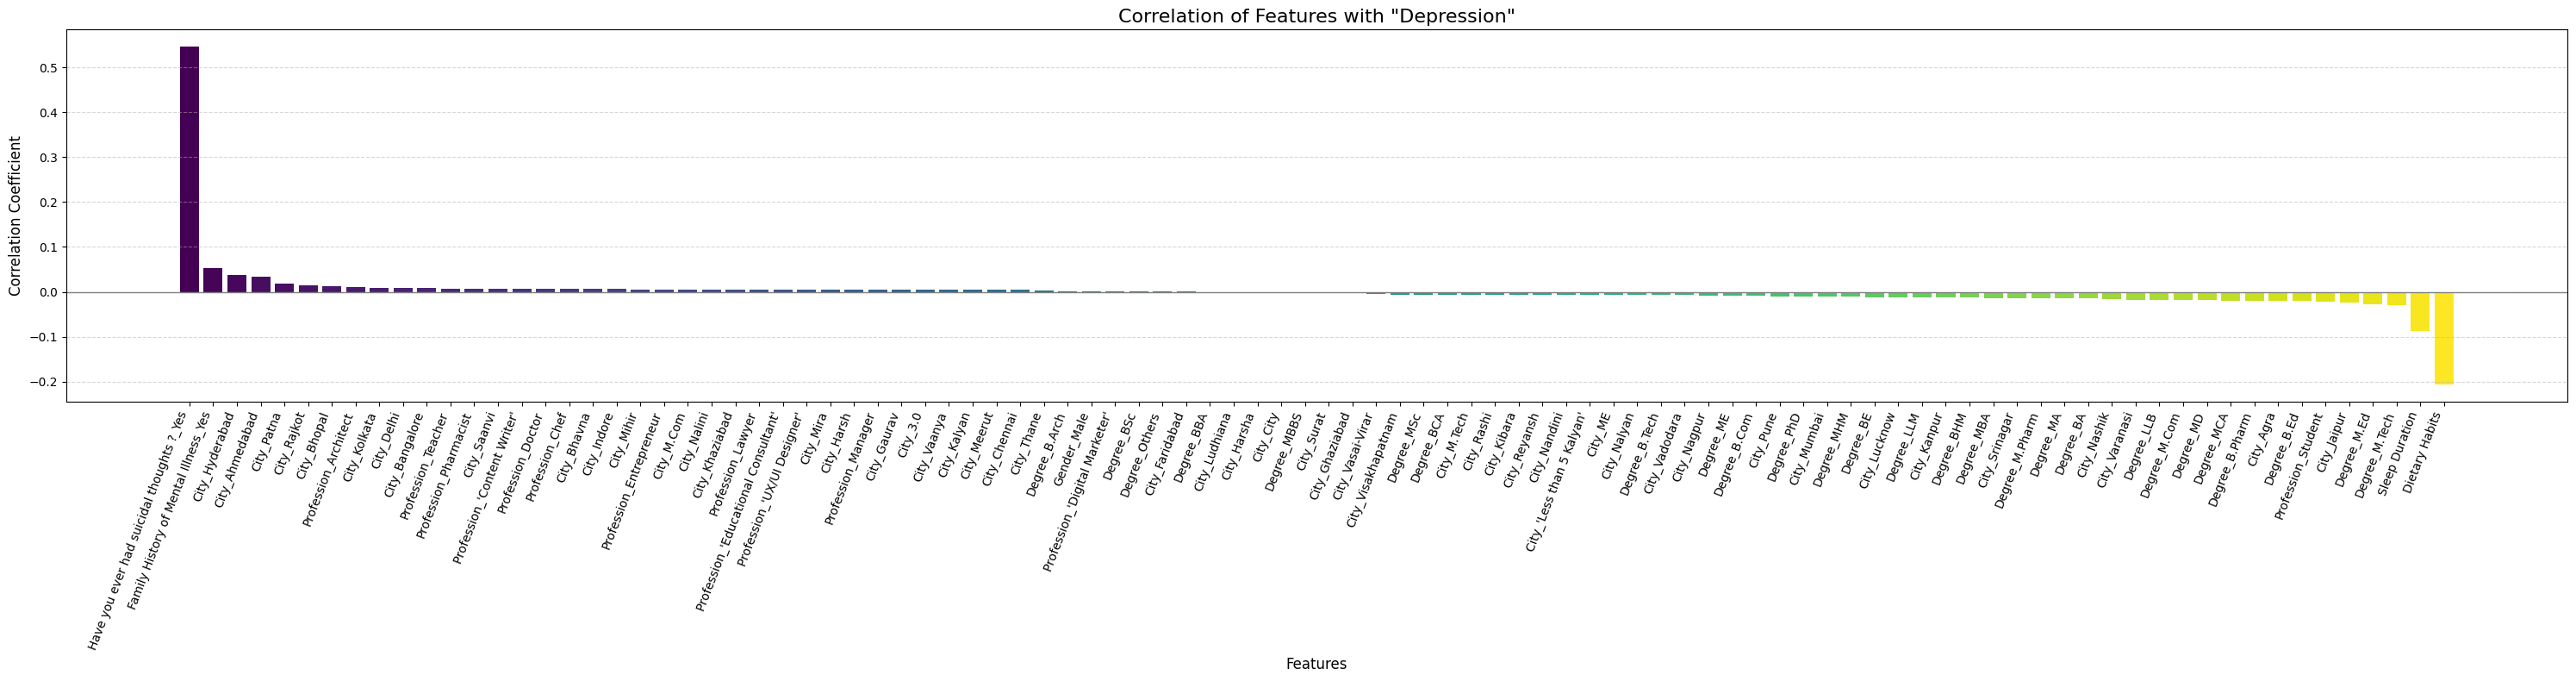

In [ ]:
plot_feature_target_correlations(pd.concat([data_num_scaled_Z[['Sleep Duration','Dietary Habits']], data_ohe, Y],axis=1))

In [ ]:
data_cat=data_cat.drop(['City','Profession','Degree'],axis=1)
data_ohe=data_cat.drop(['Sleep Duration','Dietary Habits','Sleep Duration_Encoded','Dietary Habits_Encoded'],axis=1)
data_ohe=one_hot_encode_dataframe(data_ohe)
data_ohe

,Gender_Male,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,1.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,1.0
3,0.0,1.0,1.0
4,0.0,1.0,0.0
...,...,...,...
27896,0.0,1.0,1.0
27897,1.0,0.0,1.0
27898,1.0,0.0,0.0
27899,0.0,1.0,0.0


In [ ]:
data_final=pd.concat([data_num,data_ohe],axis=1)
data_final=data_final.drop('Depression',axis=1) #final preprocessed data with scaled numerical columns adn label encoded columns and One hot encoded column(bulk of th e columns)
#14 columns ==> 3 One hot encoded : 2 z_scaled label encoded : 9 z_scaled numerical columns
data_final

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Average_Satisfaction,Resilience,Pressure_Satisfaction_Ratio,Sleep Duration,Dietary Habits,Gender_Male,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,33.0,5.0,8.97,2.0,3.0,1.0,1.0,134.55,4.950495,2.0,3.0,1.0,1.0,0.0
1,24.0,2.0,5.90,5.0,3.0,2.0,2.5,35.40,0.796813,2.0,2.0,0.0,0.0,1.0
2,31.0,3.0,7.03,5.0,9.0,1.0,2.5,189.81,1.195219,1.0,3.0,1.0,0.0,1.0
3,28.0,3.0,5.59,2.0,4.0,5.0,1.0,67.08,2.970297,3.0,2.0,0.0,1.0,1.0
4,25.0,4.0,8.13,3.0,1.0,1.0,1.5,32.52,2.649007,2.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,27.0,5.0,5.75,5.0,7.0,1.0,2.5,201.25,1.992032,2.0,1.0,0.0,1.0,1.0
27897,27.0,2.0,9.40,3.0,0.0,3.0,1.5,0.00,1.324503,1.0,3.0,1.0,0.0,1.0
27898,31.0,3.0,6.61,4.0,12.0,2.0,2.0,237.96,1.492537,2.0,1.0,1.0,0.0,0.0
27899,18.0,5.0,6.88,2.0,10.0,5.0,1.0,344.00,4.950495,1.0,3.0,0.0,1.0,0.0


# **Train test split, scaling, using default models (not tuned) to test**

### **Selecting best features**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Y = Y.reindex(data_final.index)
X_train, X_test, Y_train, Y_test = train_test_split(data_final, Y, test_size=0.2, random_state=42, stratify=Y)

scaler=MinMaxScaler().fit(X_train)

X_train_scaled = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns,
    index=X_train.index)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index)

In [ ]:
selected_features_list = select_features_with_rf(X_train_scaled, Y_train)

#Selected features only
X_train_final = X_train_scaled[selected_features_list]
X_test_final = X_test_scaled[selected_features_list] # Make sure to apply to X_test as well


--- Feature Importances from Random Forest ---
                                      Feature  Importance
12  Have you ever had suicidal thoughts ?_Yes    0.198584
7                                  Resilience    0.144612
8                 Pressure_Satisfaction_Ratio    0.095242
1                           Academic Pressure    0.092715
5                            Financial Stress    0.091483
0                                         Age    0.090658
2                                        CGPA    0.088649
4                            Work/Study Hours    0.054644
9                              Sleep Duration    0.036173
10                             Dietary Habits    0.035592
6                        Average_Satisfaction    0.018565
3                          Study Satisfaction    0.018090
11                                Gender_Male    0.017684
13       Family History of Mental Illness_Yes    0.017307
\nSelected 14 features out of 14 using a threshold of 0.01.
Selected Features: ['Ha

### **Training Models (Without tuning)**

classification accuracy: 0.8451890342232575
classification report               precision    recall  f1-score   support

           0       0.83      0.79      0.81      2313
           1       0.86      0.88      0.87      3268

    accuracy                           0.85      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.84      0.85      0.84      5581



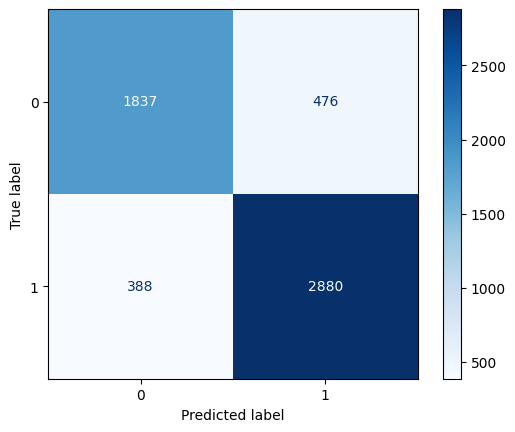

In [ ]:
logistic_clf = classify_logistic(X_train_final, Y_train, X_test_final, Y_test)

classification accuracy: 0.8419638057695753
classification report               precision    recall  f1-score   support

           0       0.83      0.78      0.80      2313
           1       0.85      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.84      5581
weighted avg       0.84      0.84      0.84      5581



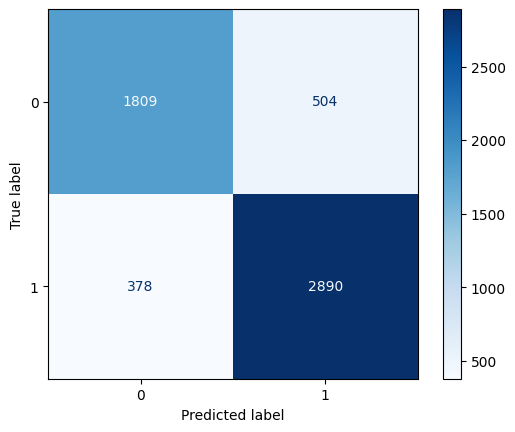

In [ ]:
classify_svc(X_train_final, Y_train, X_test_final, Y_test)

Hyperparameters passed: {}
classification accuracy: 0.8387385773158932
classification report               precision    recall  f1-score   support

           0       0.82      0.79      0.80      2313
           1       0.85      0.88      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



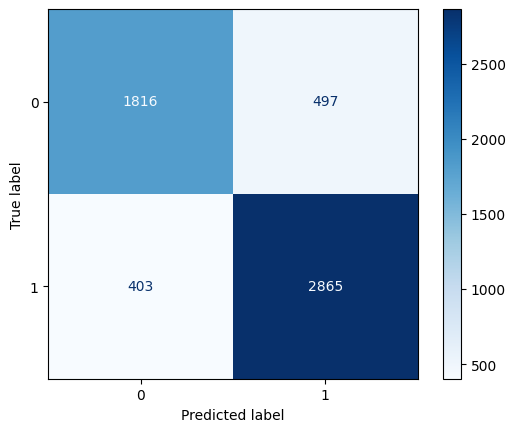

In [ ]:
classify_rf(X_train_final, Y_train, X_test_final, Y_test)

Decision Tree classification accuracy: 0.7667084751836588
Decision Tree classification report               precision    recall  f1-score   support

           0       0.72      0.72      0.72      2313
           1       0.80      0.80      0.80      3268

    accuracy                           0.77      5581
   macro avg       0.76      0.76      0.76      5581
weighted avg       0.77      0.77      0.77      5581



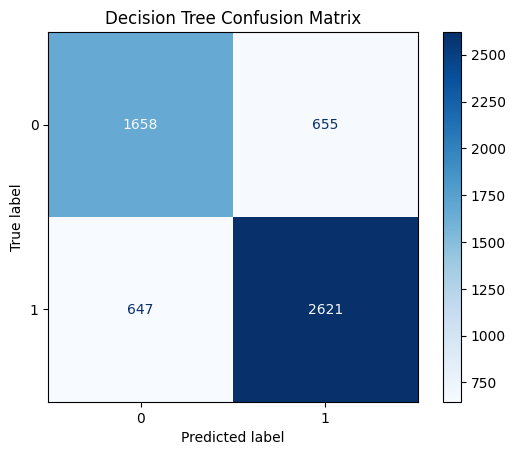

In [ ]:
classify_dt(X_train_final, Y_train, X_test_final, Y_test)

KNN classification accuracy: 0.8147285432718151
KNN classification report               precision    recall  f1-score   support

           0       0.79      0.76      0.77      2313
           1       0.83      0.86      0.84      3268

    accuracy                           0.81      5581
   macro avg       0.81      0.81      0.81      5581
weighted avg       0.81      0.81      0.81      5581



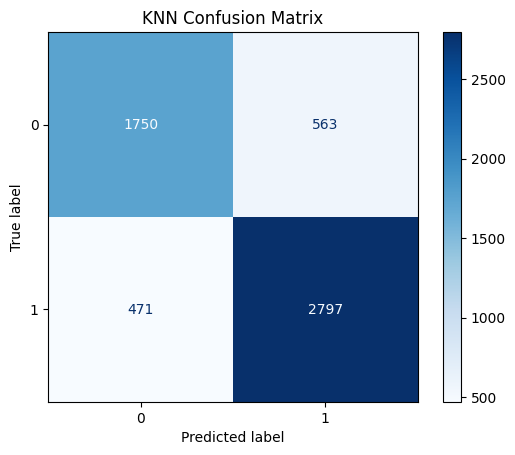

In [ ]:
classify_knn(X_train_final, Y_train, X_test_final, Y_test)

GNB classification accuracy: 0.788926715642358
GNB classification report               precision    recall  f1-score   support

           0       0.69      0.88      0.78      2313
           1       0.89      0.73      0.80      3268

    accuracy                           0.79      5581
   macro avg       0.79      0.80      0.79      5581
weighted avg       0.81      0.79      0.79      5581



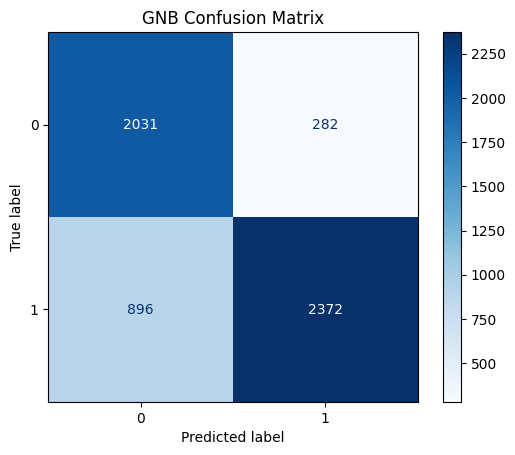

In [ ]:
classify_gnb(X_train_final, Y_train, X_test_final, Y_test)

# **Applying PCA**

In [ ]:
# Now, apply PCA to retain 95% of the variance
X_train_pca, X_test_pca, pca = apply_pca(X_train_final, X_test_final, n_components=0.95)

# Or, apply PCA to get exactly 10 components
# X_train_pca, X_test_pca, pca = apply_pca(X_train_final, X_test_final, n_components=10)

Original number of features: 14
Number of components selected: 9
Total variance explained by selected components: 0.9727


classification accuracy: 0.8380218598817416
classification report               precision    recall  f1-score   support

           0       0.79      0.83      0.81      2313
           1       0.88      0.84      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.83      0.84      0.83      5581
weighted avg       0.84      0.84      0.84      5581



LogisticRegression(class_weight='balanced', max_iter=1000)

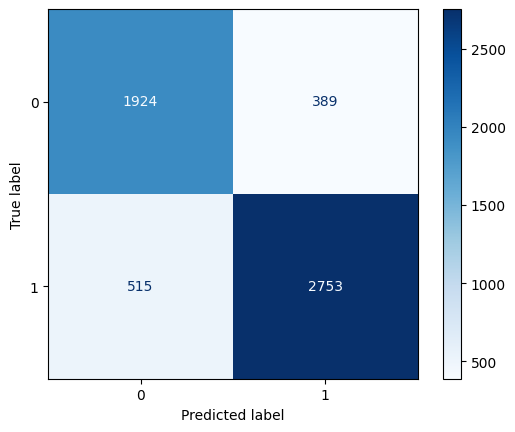

In [ ]:
classify_logistic(X_train_pca, Y_train, X_test_pca, Y_test, class_weight='balanced')
#X_train_pca.shape

# **CLASSIFICATION AFTER HYPERPARAMETER TUNING**


### **Support Vector Classifier(SVC)**

Best params: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}

In [ ]:
from scipy.stats import uniform

# C = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2]
# gammaValues = ["scale", "auto"]
# param_grid = {
#     "kernel": ["linear", "rbf", "poly"],
#     "C": C,
#     "degree": [i for i in range(1, 20)],
#     "gamma": gammaValues,
#     "decision_function_shape": ["ovo", "ovr"],
# }

###################################################
# Modifications to params to cut down on time
###################################################

param_grid = [
    # Linear kernel
    {
        "kernel": ["linear"],
        "C": [10**-3, 10**-2, 10**-1, 10**0, 10**1],
        "decision_function_shape": ["ovo", "ovr"],
    },

    # RBF kernel
    {
        "kernel": ["rbf"],
        "C": [10**-3, 10**-2, 10**-1, 10**0, 10**1],
        "gamma": ["scale"],
        "decision_function_shape": ["ovo", "ovr"],
    },
    {
        "kernel":["poly"],
        "C": [10**-3, 10**-2, 10**-1, 10**0, 10**1],
        "gamma": ["scale", "auto"],
        "decision_function_shape": ["ovo", "ovr"]

    }
]



In [ ]:
best_clf = best_svc_params_gridsearch(X_train_final, Y_train, param_grid)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END C=0.001, decision_function_shape=ovo, kernel=linear;, score=0.876 total time=  13.1s
[CV 2/5] END C=0.001, decision_function_shape=ovo, kernel=linear;, score=0.866 total time=  11.7s
[CV 3/5] END C=0.001, decision_function_shape=ovo, kernel=linear;, score=0.870 total time=  12.3s
[CV 4/5] END C=0.001, decision_function_shape=ovo, kernel=linear;, score=0.874 total time=  13.3s
[CV 5/5] END C=0.001, decision_function_shape=ovo, kernel=linear;, score=0.865 total time=  12.1s
[CV 1/5] END C=0.001, decision_function_shape=ovr, kernel=linear;, score=0.876 total time=  12.4s
[CV 2/5] END C=0.001, decision_function_shape=ovr, kernel=linear;, score=0.866 total time=  11.4s
[CV 3/5] END C=0.001, decision_function_shape=ovr, kernel=linear;, score=0.870 total time=  11.9s
[CV 4/5] END C=0.001, decision_function_shape=ovr, kernel=linear;, score=0.874 total time=  12.0s
[CV 5/5] END C=0.001, decision_function_shape=ovr, kerne

In [ ]:
#best_clf_svc = best_svc_params_randomizedsearch(X_train_final, Y_train, param_grid_svc)

In [ ]:
best_params_svc = best_clf.best_params_

In [ ]:
print("Evaluating SVC Model (Tuned)")
classify_svc(X_train_final,Y_train, X_test_final, Y_test, **best_params_svc)

In [ ]:
print("\nEvaluating SVC Model (Default)")
classify_svc(X_train_final,Y_train, X_test_final, Y_test)

### **Random Forest Classification**

Best RF Params (Random): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'gini'}

Best RF Params (Random): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_depth': None, 'criterion': 'log_loss'}

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [ ]:
#Temporarily copying this function here cuz pull is not working
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

def best_rf_params_randomizedsearch(X_train, y_train, param_grid):
    rand_search = RandomizedSearchCV(
        estimator= RandomForestClassifier(),
        param_distributions = param_grid,
        cv = 5,
        verbose = 3,
        random_state = 42)
    rand_search.fit(X_train, y_train)
    print(f"Best parameters found: {rand_search.best_params_}")
    print(f"Best score: {rand_search.best_score_}")

    return rand_search

print("Tuning Random Forest (RandomizedSearch)")
best_clf_rf_rand = best_rf_params_randomizedsearch(X_train_final, Y_train, param_grid_rf)
print(f"Best RF Params (Random): {best_clf_rf_rand.best_params_}")

Tuning Random Forest (RandomizedSearch)
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.848 total time=   5.9s
[CV 2/5] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.837 total time=   4.0s
[CV 3/5] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.841 total time=   4.9s
[CV 4/5] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.846 total time=   2.5s
[CV 5/5] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.837 total time=   2.5s
[CV 1/5] END criterion=entropy, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.849 total time=   2.3s
[CV 2/5] END criterion=entropy, max_depth=None, min_samples_leaf

Evaluating Random Forest (Tuned)
Hyperparameters passed: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'gini'}
classification accuracy: 0.8419638057695753
classification report               precision    recall  f1-score   support

           0       0.83      0.78      0.80      2313
           1       0.85      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.84      5581
weighted avg       0.84      0.84      0.84      5581



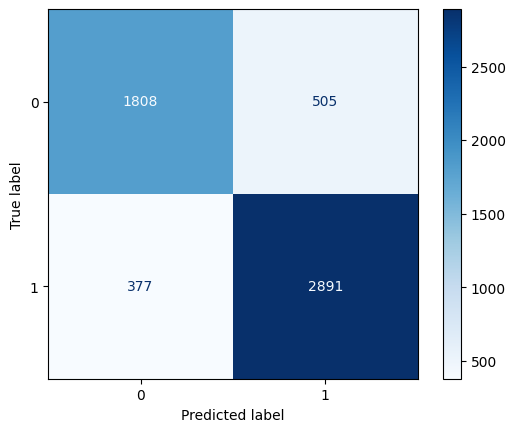

In [ ]:
print("Evaluating Random Forest (Tuned)")
classify_rf(X_train_final, Y_train, X_test_final, Y_test, **best_clf_rf_rand.best_params_)



Evaluating Random Forest (Default)
Hyperparameters passed: {}
classification accuracy: 0.8387385773158932
classification report               precision    recall  f1-score   support

           0       0.82      0.79      0.80      2313
           1       0.85      0.88      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



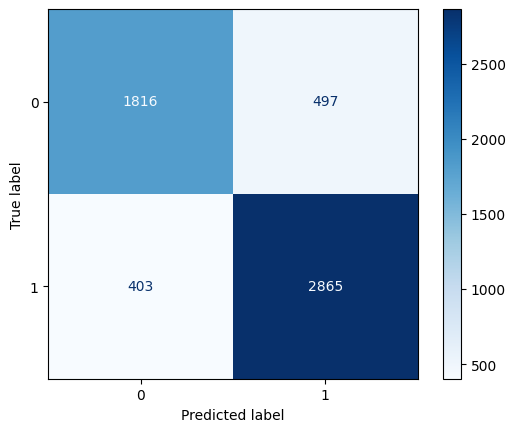

In [ ]:
print("\nEvaluating Random Forest (Default)")
classify_rf(X_train_final, Y_train, X_test_final, Y_test)

### **Decision Tree Classifier**

Best DT Params: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
print("Tuning Decision Tree (GridSearch)")
best_clf_dt_grid = best_dt_params_gridsearch(X_train_final, Y_train, param_grid_dt)
best_params_dt = best_clf_dt_grid.best_params_
print(f"Best DT Params: {best_params_dt}")

Tuning Decision Tree (GridSearch)
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters found: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV score: 0.8332
Best DT Params: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}


Evaluating Decision Tree (Tuned)
Decision Tree classification accuracy: 0.8283461745206953
Decision Tree classification report               precision    recall  f1-score   support

           0       0.79      0.79      0.79      2313
           1       0.85      0.85      0.85      3268

    accuracy                           0.83      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581



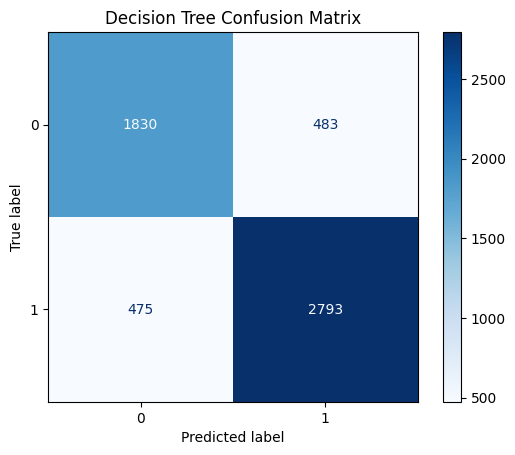

In [ ]:
print("Evaluating Decision Tree (Tuned)")
classify_dt(X_train_final, Y_train, X_test_final, Y_test, **best_params_dt)

Evaluating Decision Tree (Default)
Decision Tree classification accuracy: 0.7631248880129009
Decision Tree classification report               precision    recall  f1-score   support

           0       0.71      0.71      0.71      2313
           1       0.80      0.80      0.80      3268

    accuracy                           0.76      5581
   macro avg       0.76      0.76      0.76      5581
weighted avg       0.76      0.76      0.76      5581



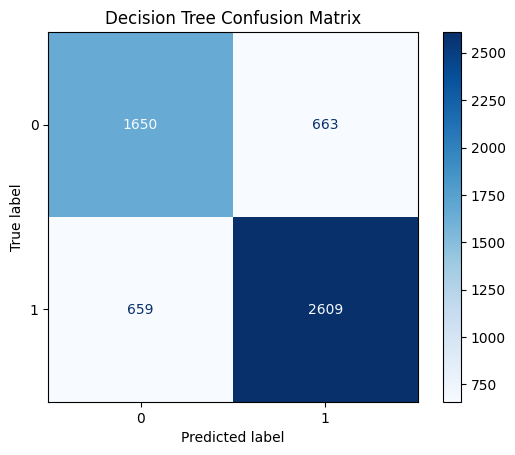

In [ ]:
print("Evaluating Decision Tree (Default)")
classify_dt(X_train_final, Y_train, X_test_final, Y_test)

### **K-Nearest Neighbors Classifier**

Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

In [ ]:
print("Tuning KNN (GridSearch)")
best_clf_knn_grid = best_knn_params_gridsearch(X_train_final, Y_train, param_grid_knn)
best_params_knn = best_clf_knn_grid.best_params_
print(f"Best KNN Params: {best_params_knn}")

Tuning KNN (GridSearch)
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameters found: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Best CV score: 0.8323
Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


Evaluating KNN (Tuned)
KNN classification accuracy: 0.8353341695036732
KNN classification report               precision    recall  f1-score   support

           0       0.82      0.77      0.80      2313
           1       0.84      0.88      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.83      0.84      0.83      5581



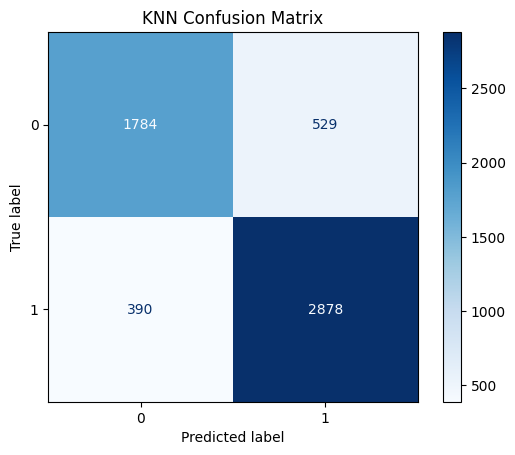

In [ ]:
print("Evaluating KNN (Tuned)")
classify_knn(X_train_final, Y_train, X_test_final, Y_test, **best_params_knn)

Evaluating KNN (Default, n_neighbors=5)
KNN classification accuracy: 0.8147285432718151
KNN classification report               precision    recall  f1-score   support

           0       0.79      0.76      0.77      2313
           1       0.83      0.86      0.84      3268

    accuracy                           0.81      5581
   macro avg       0.81      0.81      0.81      5581
weighted avg       0.81      0.81      0.81      5581



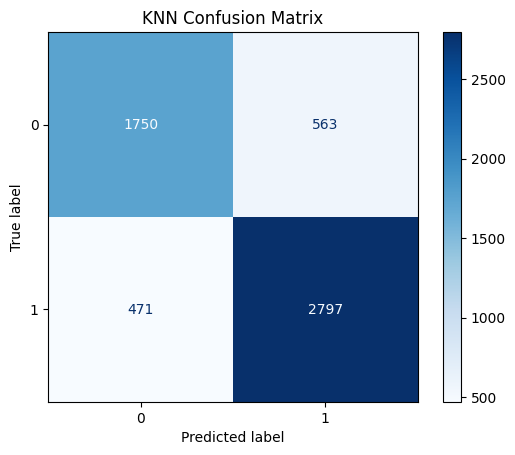

In [ ]:
print("Evaluating KNN (Default, n_neighbors=5)")
classify_knn(X_train_final, Y_train, X_test_final, Y_test)

### **Gaussian Naive Bayes Classifier**

Best GNB Params: {'var_smoothing': np.float64(1.0)}

In [ ]:
import numpy as np

param_grid_gnb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

In [ ]:
print("Tuning GNB (GridSearch)")
best_clf_gnb_grid = best_gnb_params_gridsearch(X_train_final, Y_train, param_grid_gnb)
best_params_gnb = best_clf_gnb_grid.best_params_
print(f"Best GNB Params: {best_params_gnb}")

Tuning GNB (GridSearch)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'var_smoothing': np.float64(0.1)}
Best CV score: 0.8362
Best GNB Params: {'var_smoothing': np.float64(0.1)}


Evaluating GNB (Tuned)
GNB classification accuracy: 0.837484321806128
GNB classification report               precision    recall  f1-score   support

           0       0.80      0.80      0.80      2313
           1       0.86      0.86      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



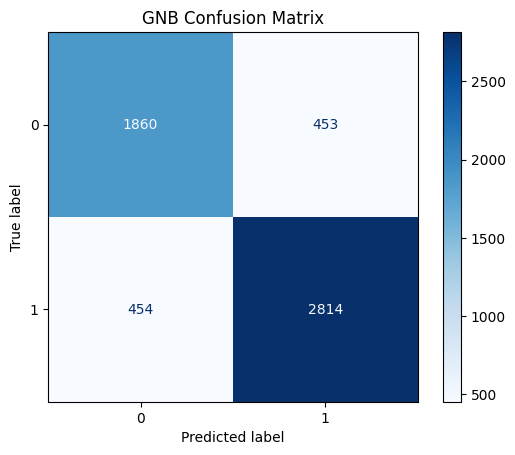

In [ ]:
print("Evaluating GNB (Tuned)")
classify_gnb(X_train_final, Y_train, X_test_final, Y_test, **best_params_gnb)


Evaluating GNB (Default)
GNB classification accuracy: 0.788926715642358
GNB classification report               precision    recall  f1-score   support

           0       0.69      0.88      0.78      2313
           1       0.89      0.73      0.80      3268

    accuracy                           0.79      5581
   macro avg       0.79      0.80      0.79      5581
weighted avg       0.81      0.79      0.79      5581



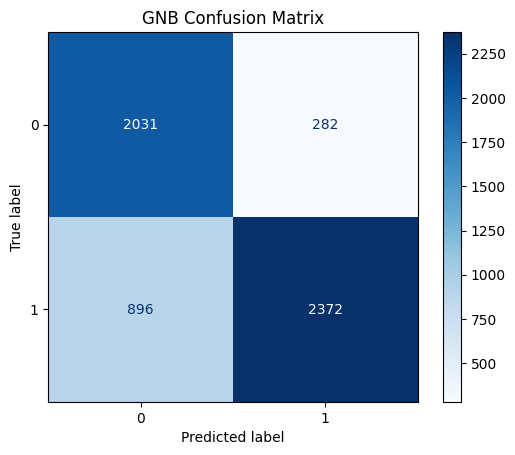

In [ ]:
print("\nEvaluating GNB (Default)")
classify_gnb(X_train_final, Y_train, X_test_final, Y_test)

### **Classification Models Compared**

In [ ]:
best_models_to_compare = {
    # "SVC": best_clf_svc_grid.best_estimator_,
    # "RandomForest": best_clf_rf_grid.best_estimator_,
    "DecisionTree": best_clf_dt_grid.best_estimator_,
    "KNN": best_clf_knn_grid.best_estimator_,
    "GaussianNB": best_clf_gnb_grid.best_estimator_,
    "LogisticRegression": logistic_clf
}

model_accuracies = {}
print("Calculating Final Accuracies:")
print()
for name, model in best_models_to_compare.items():
    y_pred = model.predict(X_test_final)
    acc = accuracy_score(Y_test, y_pred)
    model_accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Calculating Final Accuracies:

DecisionTree Accuracy: 0.8283
KNN Accuracy: 0.8353
GaussianNB Accuracy: 0.8375
LogisticRegression Accuracy: 0.8452


In [ ]:
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model_name]

print(f"Best Performing Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")

Best Performing Model: LogisticRegression
Best Accuracy: 0.8452


/tmp/ipython-input-3812014232.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


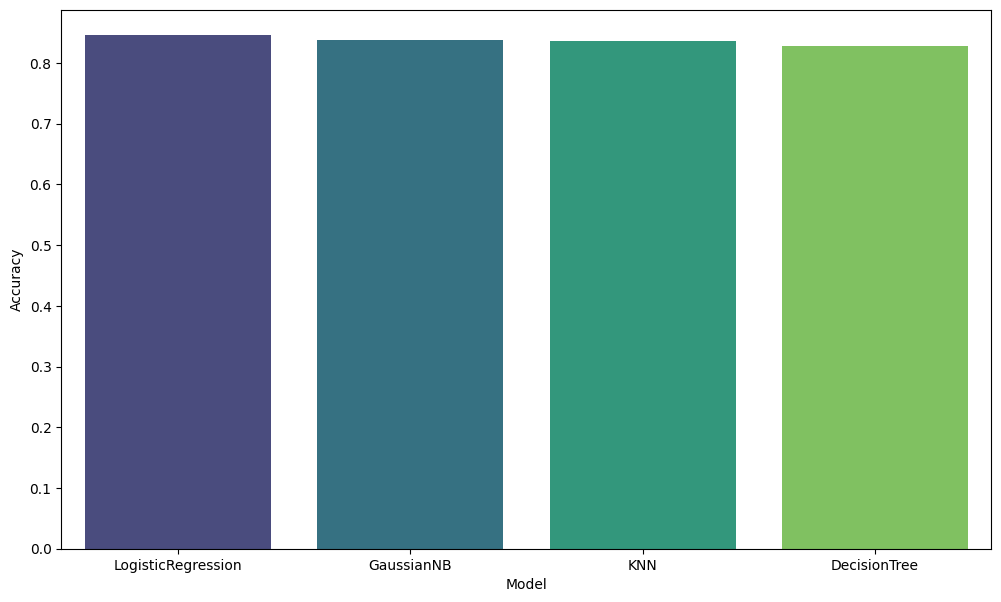

In [ ]:
acc_df = pd.DataFrame(
    list(model_accuracies.items()),
    columns=['Model', 'Accuracy']
).sort_values(by='Accuracy', ascending=False)

#Bar plot
plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    x='Model',
    y='Accuracy',
    data=acc_df,
    palette='viridis'
)

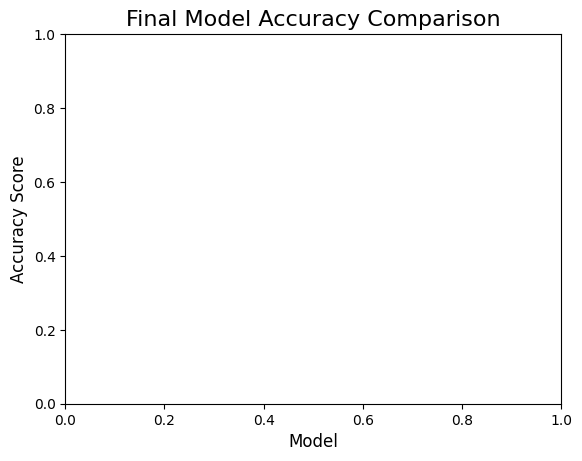

In [ ]:
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.4f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 9),
        textcoords='offset points'
    )

plt.title('Final Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0, 1.0)
plt.show()

# **REGRESSION**

### **Preparing Data for Regression**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#data_final is already MinMax or Standard scaled

# sc_reg = MinMaxScaler()
y = data['CGPA']
X = data_final.drop('CGPA', axis=1)
# Y = sc_reg.fit_transform(Y.to_numpy().reshape(-1,1))
X['Depression'] = Y

In [ ]:
from sklearn.model_selection import train_test_split
y = y.reindex(X.index)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=StandardScaler().fit(X_train)

X_train= pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns,
    index=X_train.index)

X_test= pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index)

### **Polynomial Regression {Degree: [1, 2, 3, 4]}**

In [ ]:
degrees = [1,2,3,4]
mses = []
r2s = []
for deg in degrees:
    poly = PolynomialFeatures(deg)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2s.append(r2)
    mses.append(mse)


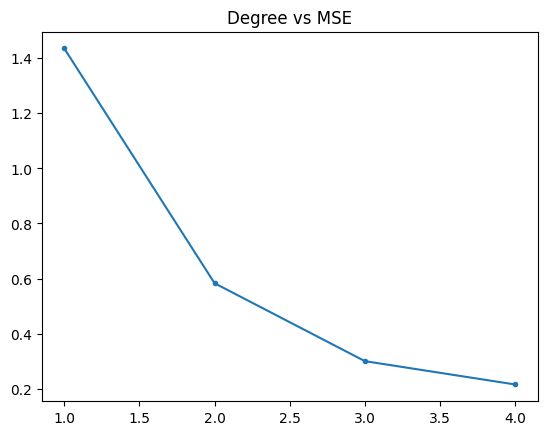

In [ ]:
plt.title("Degree vs MSE")
plt.plot(degrees, mses, marker='.')
plt.show()

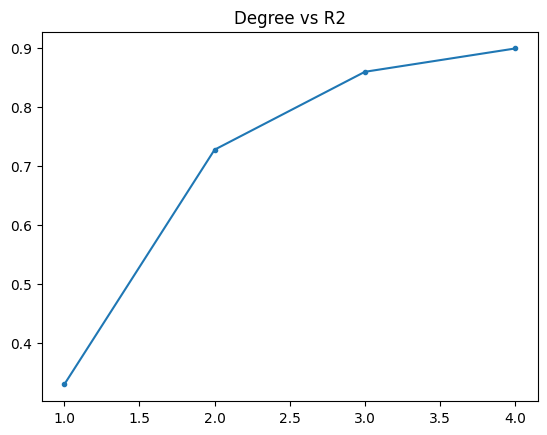

In [ ]:
plt.title("Degree vs R2")
plt.plot(degrees, r2s, marker='.')
plt.show()

### **Polynomial Regression {Degree = 4}**


Polynomial Linear Regression (Degree 4)
R2 Score: 0.8990002969615523
Mean Squared Error: 0.21606268937059658


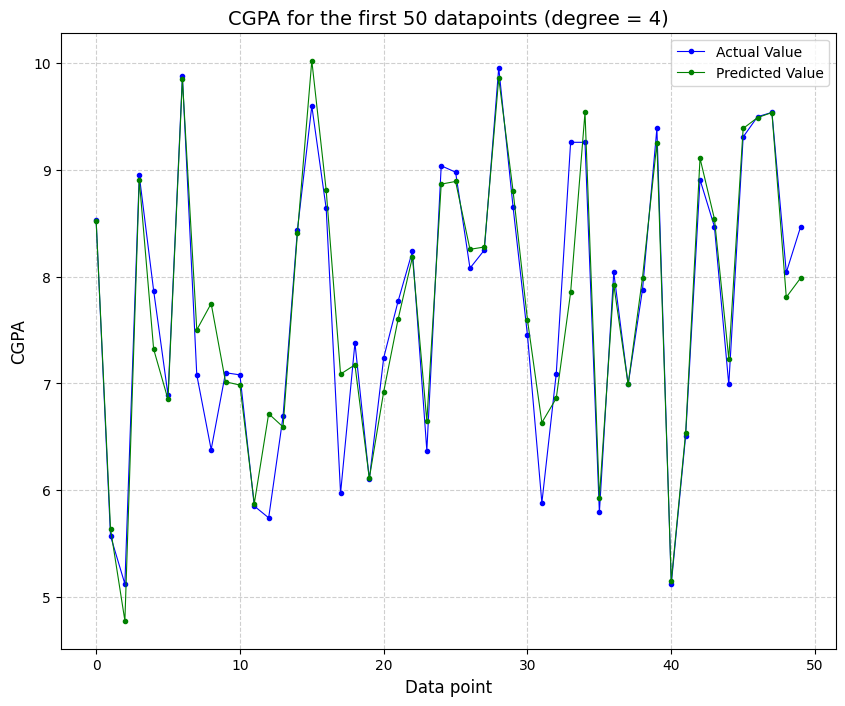

In [ ]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


degree = 4
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nPolynomial Linear Regression (Degree {degree})")
print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")

plt.figure(figsize=(10, 8))
    # sns.scatterplot(x=y_pred, y=residuals, color='dodgerblue', edgecolor='k', s=60)

    # plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title(f"CGPA for the first 50 datapoints (degree = {degree})", fontsize=14)
plt.plot(np.arange(len(y_test[:50])), y_test[:50], color='blue', linewidth = 0.8, label = "Actual Value", marker = '.')
plt.plot(np.arange(len(y_pred[:50])), y_pred[:50], color='green', linewidth = 0.8, label = "Predicted Value", marker = '.')
plt.xlabel("Data point", fontsize=12)
plt.ylabel("CGPA", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### **Random Forest Regressor**


--- Random Forest Regressor ---
R2 Score: 0.9267349389222488
Mean Squared Error: 0.15673161065962726


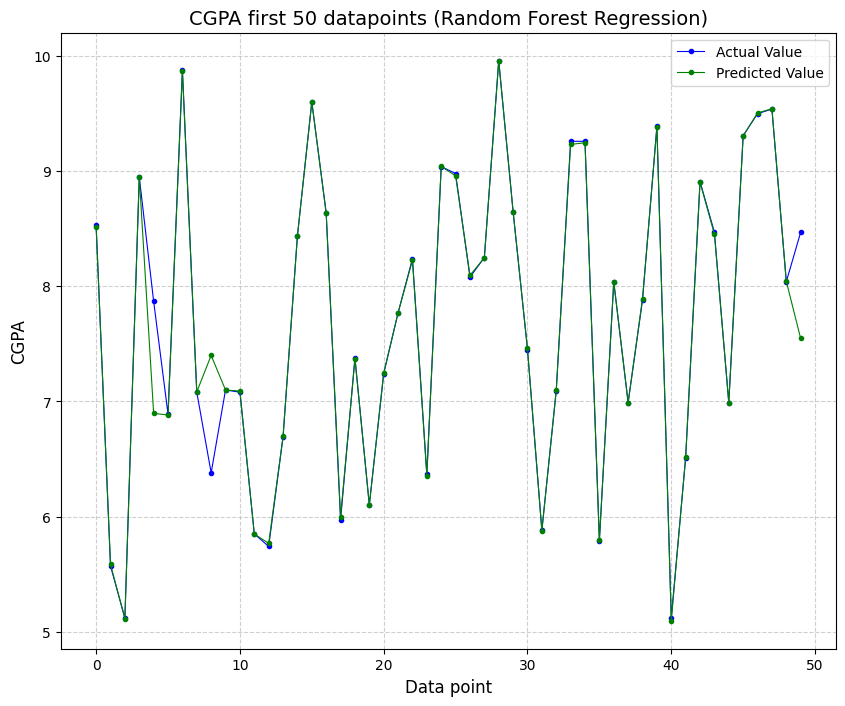

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=50, n_jobs=-1)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)
mse_reg = mean_squared_error(y_test, y_pred)
r2_reg = r2_score(y_test, y_pred)

print("\n--- Random Forest Regressor ---")
print("R2 Score:", r2_reg)
print("Mean Squared Error:", mse_reg)


plt.figure(figsize=(10, 8))
    # sns.scatterplot(x=y_pred, y=residuals, color='dodgerblue', edgecolor='k', s=60)

    # plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title("CGPA first 50 datapoints (Random Forest Regression)", fontsize=14)
plt.plot(np.arange(len(y_test[:50])), y_test[:50], color='blue', linewidth = 0.8, label = "Actual Value",marker='.')
plt.plot(np.arange(len(y_pred[:50])), y_pred[:50], color='green', linewidth = 0.8, label = "Predicted Value",marker='.')
plt.xlabel("Data point", fontsize=12)
plt.ylabel("CGPA", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

res = []
n = np.arange(10,410,10)
for i in n:
    rf_regressor = RandomForestRegressor(random_state=42, n_estimators=i, n_jobs=-1)
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)
    mse_reg = mean_squared_error(y_test, y_pred)
    r2_reg = r2_score(y_test, y_pred)
    res.append(mse_reg)

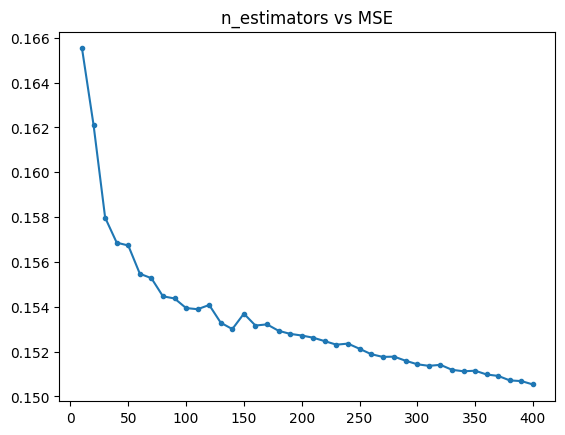

In [ ]:
plt.title("n_estimators vs MSE")
plt.plot(n, res, marker='.')
plt.show()


--- Random Forest Regressor ---
R2 Score: 0.9278394204548344
Mean Squared Error: 0.15436885866025002


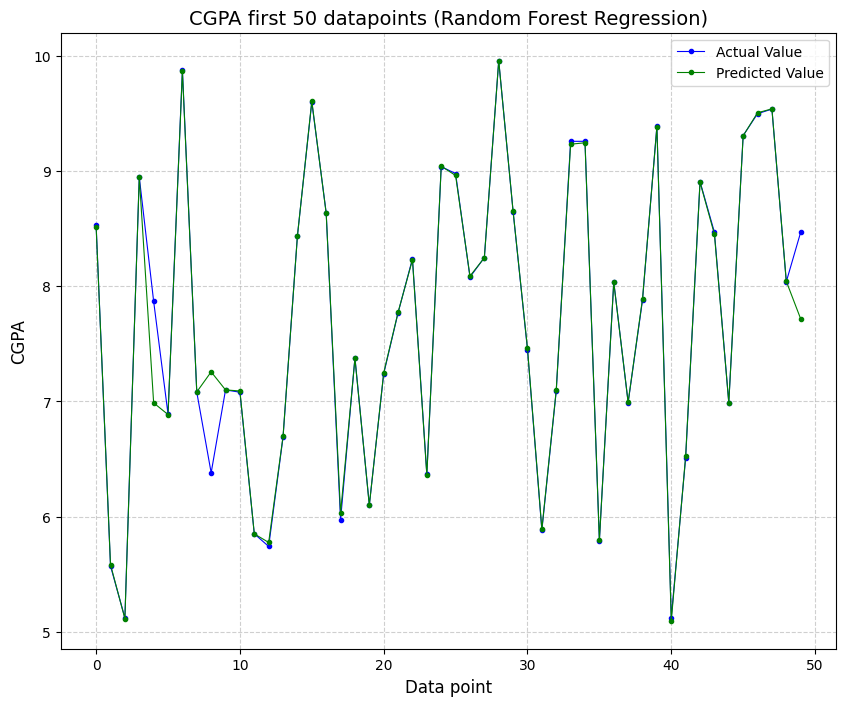

In [ ]:
## BEST ESTIMATOR USING KNEE POINT

from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=90, n_jobs=-1)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)
mse_reg = mean_squared_error(y_test, y_pred)
r2_reg = r2_score(y_test, y_pred)

print("\n--- Random Forest Regressor ---")
print("R2 Score:", r2_reg)
print("Mean Squared Error:", mse_reg)


plt.figure(figsize=(10, 8))
    # sns.scatterplot(x=y_pred, y=residuals, color='dodgerblue', edgecolor='k', s=60)

    # plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title("CGPA first 50 datapoints (Random Forest Regression)", fontsize=14)
plt.plot(np.arange(len(y_test[:50])), y_test[:50], color='blue', linewidth = 0.8, label = "Actual Value",marker='.')
plt.plot(np.arange(len(y_pred[:50])), y_pred[:50], color='green', linewidth = 0.8, label = "Predicted Value",marker='.')
plt.xlabel("Data point", fontsize=12)
plt.ylabel("CGPA", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# **CLUSTERING**

### **Prepping data for Clustering**

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# #final dataset already created above
# df = data_final.copy()

# # Continuous numeric features (these are scaled)
# continuous_cols = [
#     "Age",
#     "CGPA",
#     "Work/Study Hours",
# ]

# # Ordinal numeric (OK to scale)
# ordinal_cols = [
#     "Academic Pressure",
#     "Study Satisfaction",
#     "Financial Stress",
#     "Average_Satisfaction",
#     "Resilience",
#     "Pressure_Satisfaction_Ratio"
# ]

# # Categorical (DO NOT scale, one hot encode these)
# categorical_cols = [
#     "Sleep Duration",
#     "Dietary Habits"
# ]

# # Binary columns (leave them as they are)
# binary_cols = [
#     "Gender_Male",
#     "Have you ever had suicidal thoughts ?_Yes",
#     "Family History of Mental Illness_Yes"
# ]

# preprocessor = ColumnTransformer(
#     transformers=[
#         ("num_scale", StandardScaler(), continuous_cols + ordinal_cols),
#         ("cat_ohe", OneHotEncoder(drop="first"), categorical_cols),
#         # binary columns pass through automatically
#     ],
#     remainder="passthrough"
# )

# X_processed = preprocessor.fit_transform(df)

# # Get feature names for later use
# ohe_features = preprocessor.named_transformers_["cat_ohe"].get_feature_names_out(categorical_cols)
# final_feature_names = (
#     continuous_cols +
#     ordinal_cols +
#     list(ohe_features) +
#     binary_cols
# )

# # Convert to DataFrame for easier viewing
# X_processed_df = pd.DataFrame(X_processed, columns=final_feature_names)

# X_processed_df.head()


In [ ]:
import copy
X_processed_df = copy.deepcopy(data_final)

In [ ]:
#clipping Pressure_Satisfaction_Ratio as this feature has outliers
import numpy as np

# Calculate percentiles
lower, upper = np.percentile(
    X_processed_df["Pressure_Satisfaction_Ratio"],
    [1, 99]
)

# Clip values
X_processed_df["Pressure_Satisfaction_Ratio"] = \
    X_processed_df["Pressure_Satisfaction_Ratio"].clip(lower, upper)

X_processed_df["Pressure_Satisfaction_Ratio"].describe()



,Pressure_Satisfaction_Ratio
count,27901.000000
mean,2.924585
std,2.446459
min,0.398406
25%,1.195219
50%,1.990050
75%,3.921569
max,9.803922


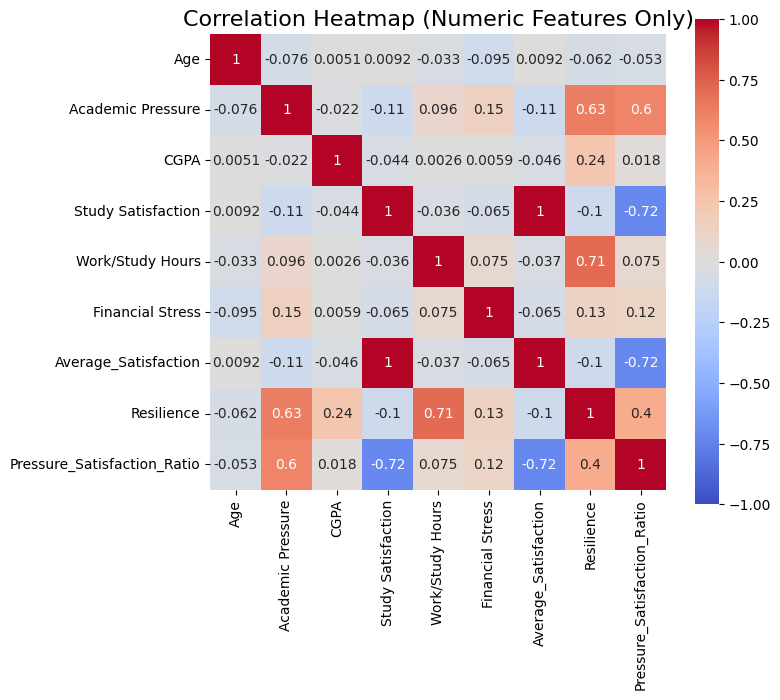

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#numeric-only feature list
numeric_cols = [
    "Age",
    "Academic Pressure",
    "CGPA",
    "Study Satisfaction",
    "Work/Study Hours",
    "Financial Stress",
    "Average_Satisfaction",
    "Resilience",
    "Pressure_Satisfaction_Ratio"
]

numeric_df = X_processed_df[numeric_cols]

plt.figure(figsize=(8,7))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    square=True
)
plt.title("Correlation Heatmap (Numeric Features Only)", fontsize=16)
plt.tight_layout()
plt.show()


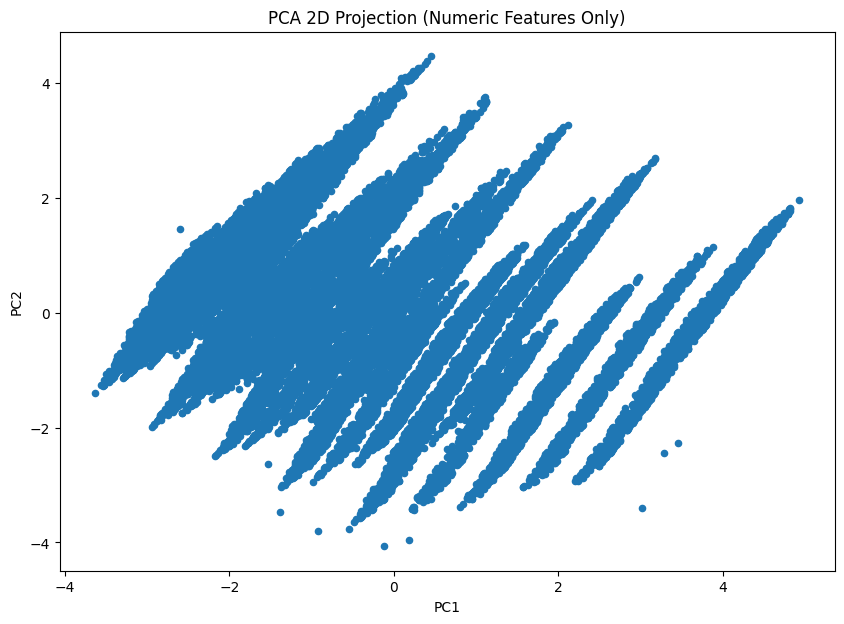

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

numeric_df = X_processed_df[numeric_cols]

# Scaling
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_df)

# PCA
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(numeric_scaled)

pca_df = pd.DataFrame({
    "PC1": pca_2d[:, 0],
    "PC2": pca_2d[:, 1]
})

plt.figure(figsize=(10,7))
plt.scatter(pca_df["PC1"], pca_df["PC2"], s=20)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D Projection (Numeric Features Only)")
plt.show()



# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import pandas as pd

# numeric_df = X_processed_df

# # Scaling
# # scaler = StandardScaler()
# # numeric_scaled = scaler.fit_transform(numeric_df)

# # PCA
# pca = PCA(n_components=2)
# pca_2d = pca.fit_transform(numeric_df)

# pca_df = pd.DataFrame({
#     "PC1": pca_2d[:, 0],
#     "PC2": pca_2d[:, 1]
# })

# plt.figure(figsize=(10,7))
# plt.scatter(pca_df["PC1"], pca_df["PC2"], s=20)
# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.title("PCA 2D Projection (Numeric Features Only)")
# plt.show()


### **K-Means Clustering**

In [ ]:
X = X_processed_df

In [ ]:
import importlib
import funcs.clustering
importlib.reload(funcs.clustering)


<module 'funcs.clustering' from '/content/depression_project/depression_project/funcs/clustering.py'>

[KMeans] k=2 | inertia=147110670.2327695 | silhouette=0.6083843839415903
[KMeans] k=3 | inertia=69554534.99559067 | silhouette=0.5794414685588932
[KMeans] k=4 | inertia=41616173.04663875 | silhouette=0.5491467759015543
[KMeans] k=5 | inertia=27950548.797764078 | silhouette=0.5195318019656119
[KMeans] k=6 | inertia=19610359.266451765 | silhouette=0.5156816592781319
[KMeans] k=7 | inertia=15029212.985205358 | silhouette=0.5093535761967133
[KMeans] k=8 | inertia=11605373.674280947 | silhouette=0.4989136442072751
[KMeans] k=9 | inertia=9518840.061958184 | silhouette=0.48334141872555675
[KMeans] k=10 | inertia=8037075.64167816 | silhouette=0.47375863450046035


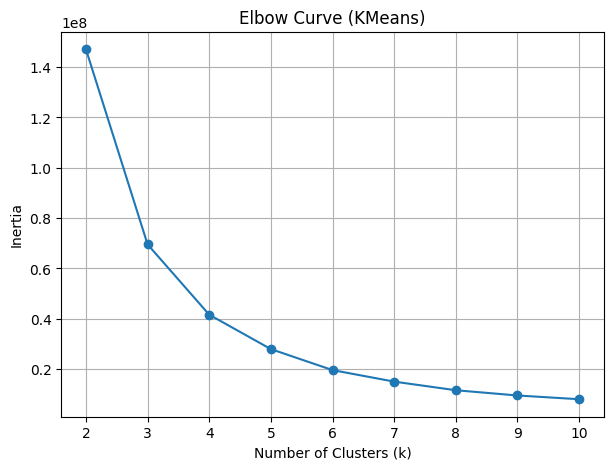

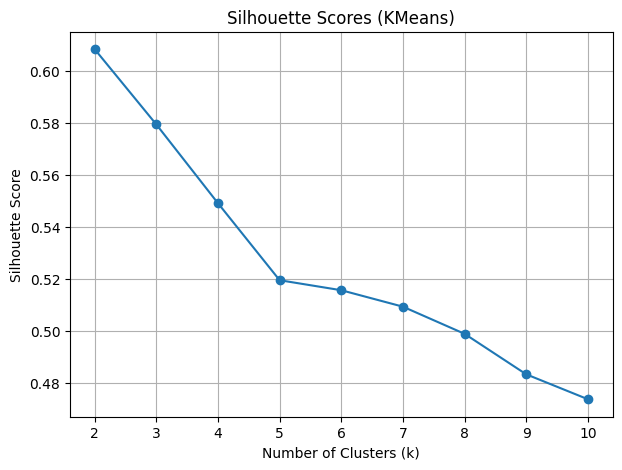


Running final KMeans with k=2

[KMEANS] k = 2
Silhouette Score: 0.6083843839415903
Davies-Bouldin Index: 0.5456753612966915
Calinski-Harabasz Index: 65123.24415598834


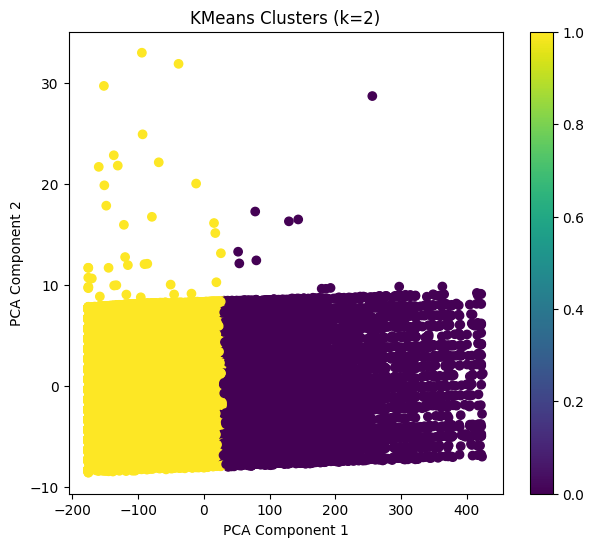

In [ ]:
# ------------------------------
# K-MEANS CLUSTERING
# ------------------------------

from funcs.clustering import (
    run_kmeans_range,
    plot_elbow_curve,
    plot_silhouette_scores,
    run_kmeans_bestk,
    plot_clusters_pca
)

# Range of k values
k_values = range(2, 11)

# Run KMeans across k range
inertias, silhouettes = run_kmeans_range(X, k_values)

# Plot Elbow
plot_elbow_curve(k_values, inertias)

# Plot Silhouette Scores
plot_silhouette_scores(k_values, silhouettes)

# Choose best k (based on plots)
# When the methods disagree, the silhouette score is generally more reliable as it directly
# evaluates cluster quality (separation and cohesion), while the elbow is a heuristic and
# can be subjective. Given the clear peak at k=2 in the silhouette plot, the optimal number
# of clusters is k=2. If domain knowledge suggests more granular clusters, consider validating
# with additional metrics like the gap statistic.
k_best = 2

# Run final KMeans
labels_kmeans, kmeans_model = run_kmeans_bestk(X, k_best)

# Plot PCA clusters
plot_clusters_pca(X, labels_kmeans, f"KMeans Clusters (k={k_best})")


In [ ]:
# Add labels to a profiling dataframe
kmeans_profile_df = X.copy()
kmeans_profile_df["Cluster"] = labels_kmeans

print("\n=== KMEANS CLUSTER PROFILES ===")

# Mean values per cluster
cluster_means_k = kmeans_profile_df.groupby("Cluster").mean()
display(cluster_means_k)

# Value counts
print("\nCluster Counts:")
print(kmeans_profile_df["Cluster"].value_counts())

# # OPTIONAL: Distribution plots for each feature
# import seaborn as sns
# import matplotlib.pyplot as plt

# for col in X.columns:
#     plt.figure(figsize=(6,4))
#     sns.boxplot(data=kmeans_profile_df, x="Cluster", y=col)
#     plt.title(f"KMeans – Feature Distribution: {col}")
#     plt.show()



=== KMEANS CLUSTER PROFILES ===


,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Average_Satisfaction,Resilience,Pressure_Satisfaction_Ratio,Sleep Duration,Dietary Habits,Gender_Male,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
Cluster,,,,,,,,,,,,,,
0,25.451129,4.116297,8.006828,2.777544,9.904361,3.361419,1.388915,318.825415,4.018885,2.335214,1.839135,0.557575,0.755164,0.499904
1,26.044769,2.556778,7.445891,3.043508,5.510289,3.007051,1.522213,89.696141,2.268695,2.435712,1.942906,0.557008,0.559473,0.474405



Cluster Counts:
Cluster
1    17445
0    10456
Name: count, dtype: int64


Cluster 0: Moderate Pressure, Low Satisfaction → Higher Stress Group

Cluster 1: Low Pressure, High Satisfaction → Stable / Healthy Group

### **Hierarchical Clustering**


[HIERARCHICAL] clusters = 2, linkage = ward
Silhouette Score: 0.5948247841843646
Davies-Bouldin Index: 0.534631569648835
Calinski-Harabasz Index: 56791.07590114796


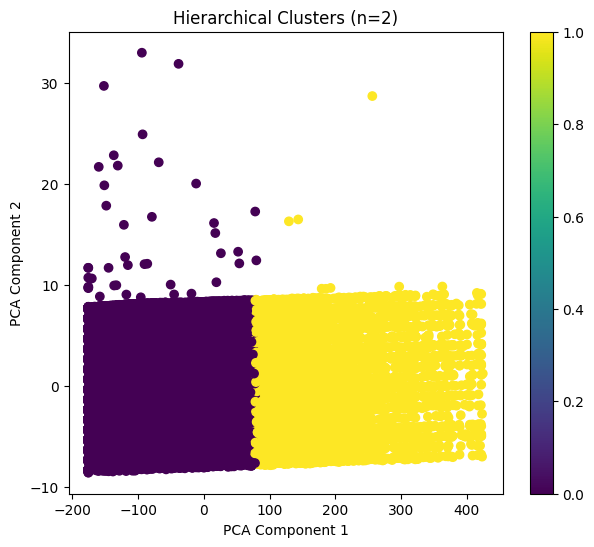

In [ ]:

# ------------------------------
# HIERARCHICAL CLUSTERING
# ------------------------------

from funcs.clustering import run_hierarchical

# cluster count for hierarchical
h_clusters = 2

labels_hier, hier_model = run_hierarchical(X, n_clusters=h_clusters)

# PCA plot function
plot_clusters_pca(X, labels_hier,
                  f"Hierarchical Clusters (n={h_clusters})")


In [ ]:
hier_profile_df = X.copy()
hier_profile_df["Cluster"] = labels_hier

print("\n=== HIERARCHICAL CLUSTER PROFILES ===")

cluster_means_h = hier_profile_df.groupby("Cluster").mean()
display(cluster_means_h)

print("\nCluster Counts:")
print(hier_profile_df["Cluster"].value_counts())

# # Distribution plots
# for col in X.columns:
#     plt.figure(figsize=(6,4))
#     sns.boxplot(data=hier_profile_df, x="Cluster", y=col)
#     plt.title(f"Hierarchical – Feature Distribution: {col}")
#     plt.show()



=== HIERARCHICAL CLUSTER PROFILES ===


,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Average_Satisfaction,Resilience,Pressure_Satisfaction_Ratio,Sleep Duration,Dietary Habits,Gender_Male,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
Cluster,,,,,,,,,,,,,,
0,25.957668,2.704218,7.463731,3.022050,6.017925,3.048372,1.511491,109.516395,2.422978,2.421991,1.932181,0.558022,0.580907,0.477778
1,25.456620,4.321703,8.175776,2.732555,10.234014,3.386973,1.366278,353.980548,4.279615,2.333378,1.827938,0.555054,0.773017,0.500663



Cluster Counts:
Cluster
0    20363
1     7538
Name: count, dtype: int64


Cluster 0: Low Academic Pressure, Moderate study Satisfisfaction → Stable

Cluster 1: High Academic Pressure, Low study Satisfaction → High-Risk

### **DBSCAN Clustering**


[DBSCAN] eps = 0.5, min_samples = 5
Clusters found: 1 (including -1 = noise)
Silhouette Score: None
Davies-Bouldin Index: None
Calinski-Harabasz Index: None


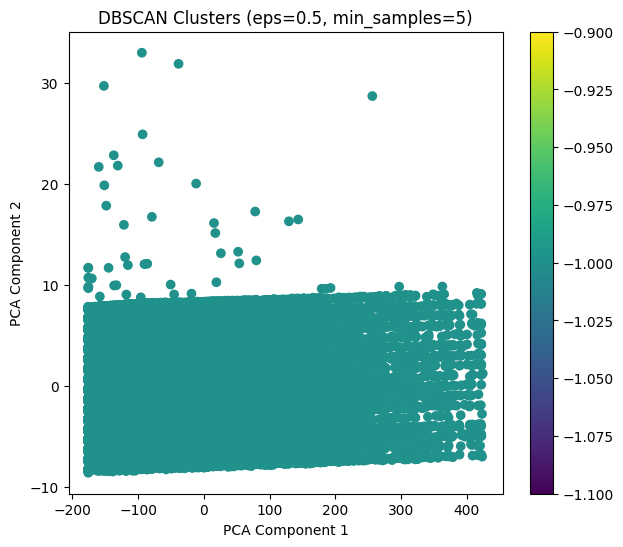

In [ ]:
# ------------------------------
# DBSCAN
# ------------------------------

from funcs.clustering import run_dbscan

# Default DBSCAN first
labels_dbscan, dbscan_model = run_dbscan(X, eps=0.5, min_samples=5)

# Plot using PCA
plot_clusters_pca(X, labels_dbscan,
                  f"DBSCAN Clusters (eps=0.5, min_samples=5)")


In [ ]:
dbscan_profile_df = X.copy()
dbscan_profile_df["Cluster"] = labels_dbscan

print("\n=== DBSCAN CLUSTER PROFILES ===")

cluster_means_d = dbscan_profile_df.groupby("Cluster").mean()
display(cluster_means_d)

print("\nCluster Counts:")
print(dbscan_profile_df["Cluster"].value_counts())

# # Distribution plots
# for col in X.columns:
#     plt.figure(figsize=(6,4))
#     sns.boxplot(data=dbscan_profile_df, x="Cluster", y=col)
#     plt.title(f"DBSCAN – Feature Distribution: {col}")
#     plt.show()



=== DBSCAN CLUSTER PROFILES ===


,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Average_Satisfaction,Resilience,Pressure_Satisfaction_Ratio,Sleep Duration,Dietary Habits,Gender_Male,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
Cluster,,,,,,,,,,,,,,
-1,25.8223,3.141214,7.656104,2.943837,7.156984,3.139852,1.472259,175.56316,2.924585,2.39805,1.904018,0.55722,0.632809,0.483961



Cluster Counts:
Cluster
-1    27901
Name: count, dtype: int64


Cluster -1:

DBSCAN returned all points as noise → no valid clusters formed.
The data does not have density-based separable structure.

### **Conclusion**

“K-Means and Hierarchical clustering produced interpretable groups, while DBSCAN failed due to the dataset having a single dense, continuous structure with no clear density-based separation.”